# **Data Science Project: Analysis of Formula One (F1) Motor Racing Data**

### Project Overview

<u>Motivation</u>
>  
My motivation for this data science project was to analyse F1 data as my son started working for a very well known F1 constructor this year and it is a sport that I am not familary with. Conducting analysis of F1 data would help me to showcase my data science skills as well as improve my understanding of this highly competitive and high-tech sport.
> 
<u>Project Problem Statement</u> 
> 
This project will explore the application of data science practices to help a fictitious online gambling company increase their profits from betting on Formula-1 (F1) racing. This project will create a predictive model based on historical F1 race data and evaluate its performance. It will also make recommendations for future iterations to improve model results, thereby increasing profits.

Nb. Given the limited project timelines available, this project will focus on analysis of Driver performance for predicting race results (rather than other facts such as constructors, race circuits, laps, pit stops, etc).
> 
<u>About the Source Data</u>
- Description: Formula One Series Motorsport Data
- Author: Ergast Developer API (Source: Egast Developer API, https://ergast.com/mrd)
- Data Source Type: Public - Structured (Relational)
- Database: MySQL
- Data Extract Date: 07/10/2024

<em>"The Ergast Developer API is a public API that provides access to Formula 1 Racing statistics".</em> (Source: Public APIs, 2024, https://publicapis.io/ergast-f1-api). It captures historical records of F1 motor racing data since the beginning of the world championships in 1950. According to the offical documentation, the Ergast Developer API is an 'experimental' web service - as it is a public data set, is referenced from multiple sources and regularly used for data analysis on Kaggle.com, it is deemed reliable for the purposes of this project.

The data model schema itself has been implemented using a highly normalised design using 3rd normal form (3NF). As such there are multiple fact tables and dimension tables. 
The fact tables include: 
- results.csv - race result details.
- driver_standings.csv - driver championship standings.
- constructor_results.csv - constructor results from races.
- constructor_standings.csv - constructor championship standings.
- lap_times.csv - race lap time details (nb. Lap time data is available from the 1996 season onwards. Lap time queries require the season, round and lap number to be specified).
- pit_stops.csv - race pit stop details (Pit stop data is available from the 2012 season onwards. Pit stop queries require a season and a round to be specified).
- qualifying.csv - driver qualifying details (nb. Qualifying results are only fully supported from the 2003 season onwards).
- sprint_results.csv - race sprint results (nb. Sprint qualifying results are available for races where there is a Sprint element in race schedule entry).

The dimension tables include:
- circuits.csv - race circuits.
- constructors.csv - constructor teams.
- drivers.csv - drivers.
- races.csv - races schedule.
- seasons.csv - race seasons.
- status.csv - finish status codes.
> 
<u>Terms of use for the source data</u>
> 
The Ergast Developer API may be used for personal, non-commercial applications and services including educational and research purposes (Source: Ergast Developer API, https://ergast.com/mrd/terms).
> 
<u>Data Ingestion Approach</u>
> 
Although there is a dedicated API for querying the database to return data in JSON format, I currently possess limited experience in the use of programming using Python and the Pandas library (for data manipulation). As such I opted to ingest the data by taking a snapshot of each table as separate CSV files, and loading these indvidually as this was easier to do in the time available for this project. As my Python and Pandas experience progresses, a future iteration of this project would be to use API calls to return the data in JSON structure to load directly into Pandas dataframes, so that data ingestion would always be using the latest data available rather than taking a static point-in-time snapshot using intermediate CSV files.  
Also, the Ergast API has been deprecated and will not be maintained beyond completion of the 2024 F1 race season - it is due to be replaced by an updated API, called Jolpica (Source: Jolpica, https://github.com/jolpica/jolpica-f1) 

## Import Libraries

In [1]:
# Import library packages

# data management
import pandas as pd
import numpy as np

# models
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# other
from datetime import datetime

## Ingest Data

In [2]:
# Declare functions

# Function to load specific source data files into global variables
# TODO: Change data ingestion from loading static csv files to API calls.
def load_data():
  
    global df_results
    global df_lap_times
    global df_races
    global df_pit_stops
    global df_status
    global df_qualifying
    global df_seasons
    global df_drv
    global df_drv_standings
    global df_cstr
    global df_cstr_results
    global df_cstr_standings
    global df_circuits
    
    try:
        df_results = pd.read_csv('Data/results.csv')
    except FileNotFoundError:
        print("Error: 'results.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'results.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'results.csv': {e}")

    try:
        df_lap_times = pd.read_csv('Data/lap_Times.csv')
    except FileNotFoundError:
        print("Error: 'lap_Times.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'lap_Times.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'lap_Times.csv': {e}")

    try:
        df_races = pd.read_csv('Data/races.csv')
    except FileNotFoundError:
        print("Error: 'races.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'races.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'races.csv': {e}")

    try:
        df_pit_stops = pd.read_csv('Data/pit_stops.csv')
    except FileNotFoundError:
        print("Error: 'pit_stops.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'pit_stops.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'pit_stops.csv': {e}")

    try:
        df_status = pd.read_csv('Data/status.csv')
    except FileNotFoundError:
        print("Error: 'status.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'status.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'status.csv': {e}")

    try:
        df_qualifying = pd.read_csv('Data/qualifying.csv')
    except FileNotFoundError:
        print("Error: 'qualifying.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'qualifying.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'qualifying.csv': {e}")

    try:
        df_seasons = pd.read_csv('Data/seasons.csv')
    except FileNotFoundError:
        print("Error: 'seasons.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'seasons.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'seasons.csv': {e}")

    try:
        df_drv = pd.read_csv('Data/drivers.csv')
    except FileNotFoundError:
        print("Error: 'drivers.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'drivers.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'drivers.csv': {e}")

    try:
        df_drv_standings = pd.read_csv('Data/driver_standings.csv')
    except FileNotFoundError:
        print("Error: 'driver_standings.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'driver_standings.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'driver_standings.csv': {e}")

    try:
        df_cstr = pd.read_csv('Data/constructors.csv')
    except FileNotFoundError:
        print("Error: 'constructors.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'constructors.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'constructors.csv': {e}")

    try:
        df_cstr_results = pd.read_csv('Data/constructor_results.csv')
    except FileNotFoundError:
        print("Error: 'constructor_results.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'constructor_results.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'constructor_results.csv': {e}")

    try:
        df_cstr_standings = pd.read_csv('Data/constructor_standings.csv')
    except FileNotFoundError:
        print("Error: 'constructor_standings.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'constructor_standings.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'constructor_standings.csv': {e}")

    try:
        df_circuits = pd.read_csv('Data/circuits.csv')
    except FileNotFoundError:
        print("Error: 'circuits.csv' file not found.")
    except pd.errors.EmptyDataError:
        print("Error: 'circuits.csv' file is empty.")
    except Exception as e:
        print(f"Error loading 'circuits.csv': {e}")


In [3]:
# Load source data
load_data()

## EDA Approach for Univariate Analysis of Variables for Each Table
The purpose of conducting EDA was to get an understanding of:
- The structure of the source data (size & shape, uniqueness, column names, distribution, mean, mode, median, outliers, etc)
- The quality of the source data (missing data, column data types, uniqueness, format, etc)
- Key insights into the business meaning of the data i.e. what the variables and underlying data means in the context of F1 (distribution, outliers, etc)

The aim is to end up with a reliable dataset that contains a list of variables to be used to test the initial hypothesis using various statistical models and evaluate the subsequent performance of each. 

### EDA_UA01 - Univariate Analysis for (Race) Seasons Table
- The columns have the correct datatype.
- There are no missing values in the columns to be kept.
- The data ranges from 1950 to 2024, even though "modern Formula One began in 1946" (source: https://en.wikipedia.org/wiki/History_of_Formula_One).

In [ ]:
# EDA for the Seasons table: structure of data - summary statitics
stats = df_seasons.describe()
print(df_seasons.shape), print(df_seasons), print(stats)

(75, 2)
    year                                                url
0   2009  http://en.wikipedia.org/wiki/2009_Formula_One_...
1   2008  http://en.wikipedia.org/wiki/2008_Formula_One_...
2   2007  http://en.wikipedia.org/wiki/2007_Formula_One_...
3   2006  http://en.wikipedia.org/wiki/2006_Formula_One_...
4   2005  http://en.wikipedia.org/wiki/2005_Formula_One_...
..   ...                                                ...
70  2020  http://en.wikipedia.org/wiki/2020_Formula_One_...
71  2021  http://en.wikipedia.org/wiki/2021_Formula_One_...
72  2022  http://en.wikipedia.org/wiki/2022_Formula_One_...
73  2023  http://en.wikipedia.org/wiki/2023_Formula_One_...
74  2024  https://en.wikipedia.org/wiki/2024_Formula_One...

[75 rows x 2 columns]
              year
count    75.000000
mean   1987.000000
std      21.794495
min    1950.000000
25%    1968.500000
50%    1987.000000
75%    2005.500000
max    2024.000000


(None, None, None)

In [5]:
# EDA for the Seasons table: quality of data - check datatypes
df_seasons.dtypes

year     int64
url     object
dtype: object

In [6]:
# EDA for the Seasons table: quality of data - check missing values
print(df_seasons.isna().sum())
print(df_seasons.nunique)

year    0
url     0
dtype: int64
<bound method DataFrame.nunique of     year                                                url
0   2009  http://en.wikipedia.org/wiki/2009_Formula_One_...
1   2008  http://en.wikipedia.org/wiki/2008_Formula_One_...
2   2007  http://en.wikipedia.org/wiki/2007_Formula_One_...
3   2006  http://en.wikipedia.org/wiki/2006_Formula_One_...
4   2005  http://en.wikipedia.org/wiki/2005_Formula_One_...
..   ...                                                ...
70  2020  http://en.wikipedia.org/wiki/2020_Formula_One_...
71  2021  http://en.wikipedia.org/wiki/2021_Formula_One_...
72  2022  http://en.wikipedia.org/wiki/2022_Formula_One_...
73  2023  http://en.wikipedia.org/wiki/2023_Formula_One_...
74  2024  https://en.wikipedia.org/wiki/2024_Formula_One...

[75 rows x 2 columns]>


### EDA_UA02 - Univariate Analysis for Circuits Table
- The columns have the correct datatype.
- There are no missing values in the columns to be kept.
- There have been 76 circuits overall. In 2024, the race season consists of 24 races each on different circuits. Clearly, the circuits have changed over time (as well as the number of races in a season - see circuit EDA below). 
- Latitude (lat) and longitude (lng) could be useful if analysing weather data (external dataset to f1 data). # TODO: Ingest external weather data.
- In some countries, there have been multiple circuits, but reasons could be varied e.g. in a large country like the USA it could be something to do with promoting a less popular sport. But this may not be applicable for other countries.
- Using historical data, including 'circuit', as a variable in a predictive model should consider whether these should be treated as outliers and therefore removed if circuits have not been raced at for a long time if it is known that they are unlikely to be raced at in the future.

In [7]:
# EDA for thr Circuits table: structure of the data - summary statistics
stats = df_circuits.describe()
print(df_circuits.shape), print(df_circuits), print(stats)

(77, 9)
    circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         75     portimao    Autódromo Internacional do Algarve   
73         76      mugello  Autodromo Internazionale del Mugello   
74         77       jeddah               Jeddah Corniche Circuit   
75         78       losail          Losail International Circuit   
76         79        miami         Miami International Autodrome   

        location       country       lat        lng  alt  \
0      Melbourne     Australia -37.84970  144.96800   10   
1   Kuala Lumpur      Malaysia   2.76083  101.73800   1

(None, None, None)

In [8]:
# EDA for the Circuits table: quality of the data - check datatypes
df_circuits.dtypes

circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt             int64
url            object
dtype: object

In [9]:
# EDA for the Circuits table: quality of the data - check missing values
print(df_circuits.isna().sum())
print(df_circuits.nunique)

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64
<bound method DataFrame.nunique of     circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         75     portimao    Autódromo Internacional do Algarve   
73         76      mugello  Autodromo Internazionale del Mugello   
74         77       jeddah               Jeddah Corniche Circuit   
75         78       losail          Losail International Circuit   
76         79        miami         Miami International Autod

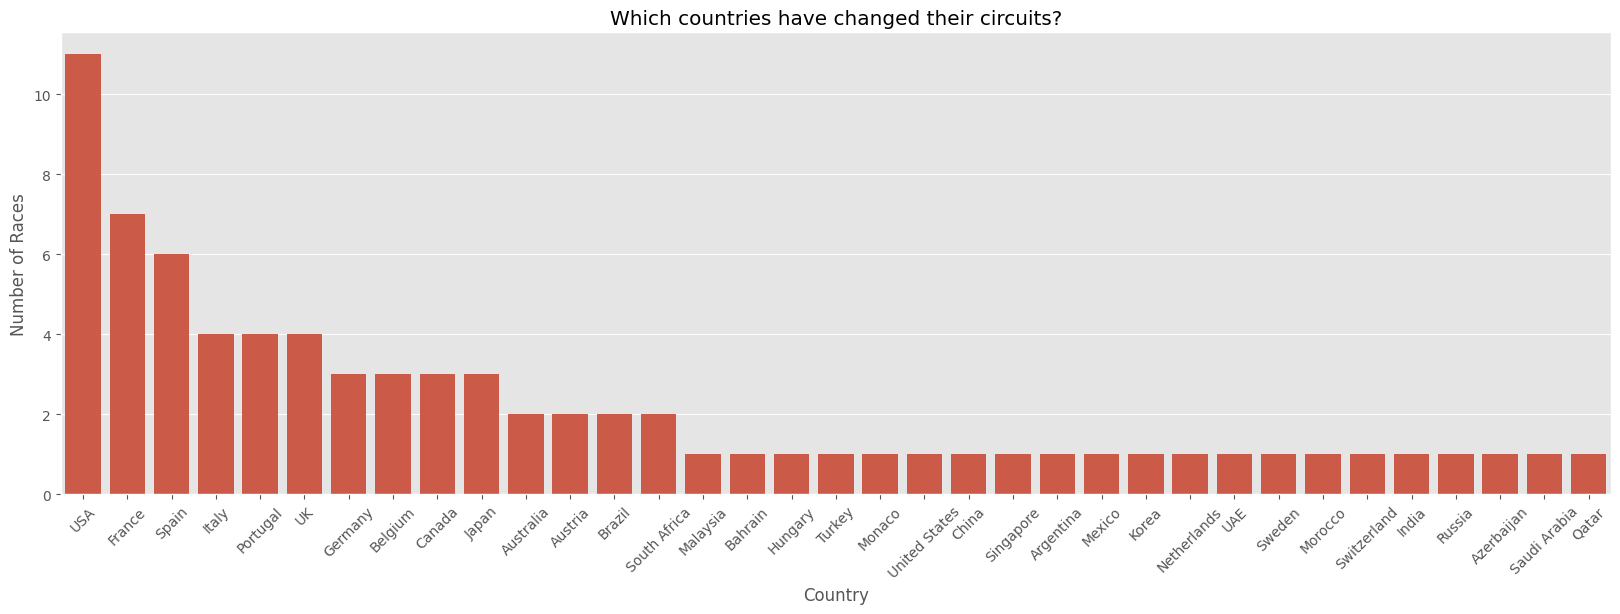

In [10]:
# EDA for the Circuits table: meaning of the data - which countries have changed their circuits?

# Create count of number of circuits by country sorted from largest to smallest
df_circ_count = df_circuits['country'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=df_circ_count.index, y=df_circ_count.values)
plt.title('Which countries have changed their circuits?')
plt.xlabel('Country')
plt.ylabel('Number of Races')
plt.xticks(rotation=45)
plt.show()

### EDA_UA03 - Univariate Analysis for Constructor Table
- The columns have the correct datatype.
- There are no missing values in the columns to be kept.
- There have been over 200 constructors over the years. There are multiple instances of certain constructors, where they have re-evolved themeselves into different companies e.g. McLaren and it is likely that some may no longer exist today. 
- In 2024 there are 10 Constructor teams. Of these: Ferrari, Aston martin, McLaren and Williams each have over 40 yrs experience; Red Bull, Mercedes, Haas have less than 20 yrs experience; and the others less than 10 yrs experience.
- The top-5 constructor nationalities are the same as the top-5 driver nationalities (see below).
- Using historical data, including 'constructor', as a variable in a predictive model should consider an appropriate treatment strategy e.g. mapping all historical brands of a constructor into one group, otherwise the different brands would be considered as separate constructors in their own right and therefore provide incorrect predictions.

In [11]:
# EDA for the Constructors table: structure of the data - summary statistics
stats = df_cstr.describe()
print(df_cstr.shape), print(df_cstr), print(stats)

(212, 5)
     constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
207            210           haas    Haas F1 Team    American   
208            211   racing_point    Racing Point     British   
209            213     alphatauri      AlphaTauri     Italian   
210            214         alpine  Alpine F1 Team      French   
211            215             rb      RB F1 Team     Italian   

                                                   url  
0                 http://en.wikipedia.org/wiki/McLaren  
1              http://en.wikipedia.org/wiki/BMW_Sauber  
2    http://en.wikipedia.org/wiki/Willi

(None, None, None)

In [12]:
# EDA for the Constructors table: quality of the data - check datatypes
df_cstr.dtypes

constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
dtype: object

In [13]:
# EDA for the Constructors table: quality of the data - check missing values
print(df_cstr.isna().sum())
print(df_cstr.nunique)

constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64
<bound method DataFrame.nunique of      constructorId constructorRef            name nationality  \
0                1        mclaren         McLaren     British   
1                2     bmw_sauber      BMW Sauber      German   
2                3       williams        Williams     British   
3                4        renault         Renault      French   
4                5     toro_rosso      Toro Rosso     Italian   
..             ...            ...             ...         ...   
207            210           haas    Haas F1 Team    American   
208            211   racing_point    Racing Point     British   
209            213     alphatauri      AlphaTauri     Italian   
210            214         alpine  Alpine F1 Team      French   
211            215             rb      RB F1 Team     Italian   

                                                   url  
0             

In [14]:
# EDA for the Constructors table: quality of the data - spot check to see if constructor has re-branded themeselves e.g. for McLaren
df_cstr_mclaren = df_cstr[df_cstr['name'].str.lower().str.contains('mclaren')]
df_cstr_mclaren

constructorId      constructorRef                 name nationality  \
0                1             mclaren              McLaren     British   
184            187        mclaren-ford         McLaren-Ford     British   
185            188       mclaren-seren  McLaren-Serenissima     British   
191            194         mclaren-brm          McLaren-BRM     British   
195            198  mclaren-alfa_romeo   McLaren-Alfa Romeo     British   

                                               url  
0             http://en.wikipedia.org/wiki/McLaren  
184      http://en.wikipedia.org/wiki/Team_McLaren  
185      http://en.wikipedia.org/wiki/Team_McLaren  
191  http://en.wikipedia.org/wiki/McLaren_(racing)  
195  http://en.wikipedia.org/wiki/McLaren_(racing)

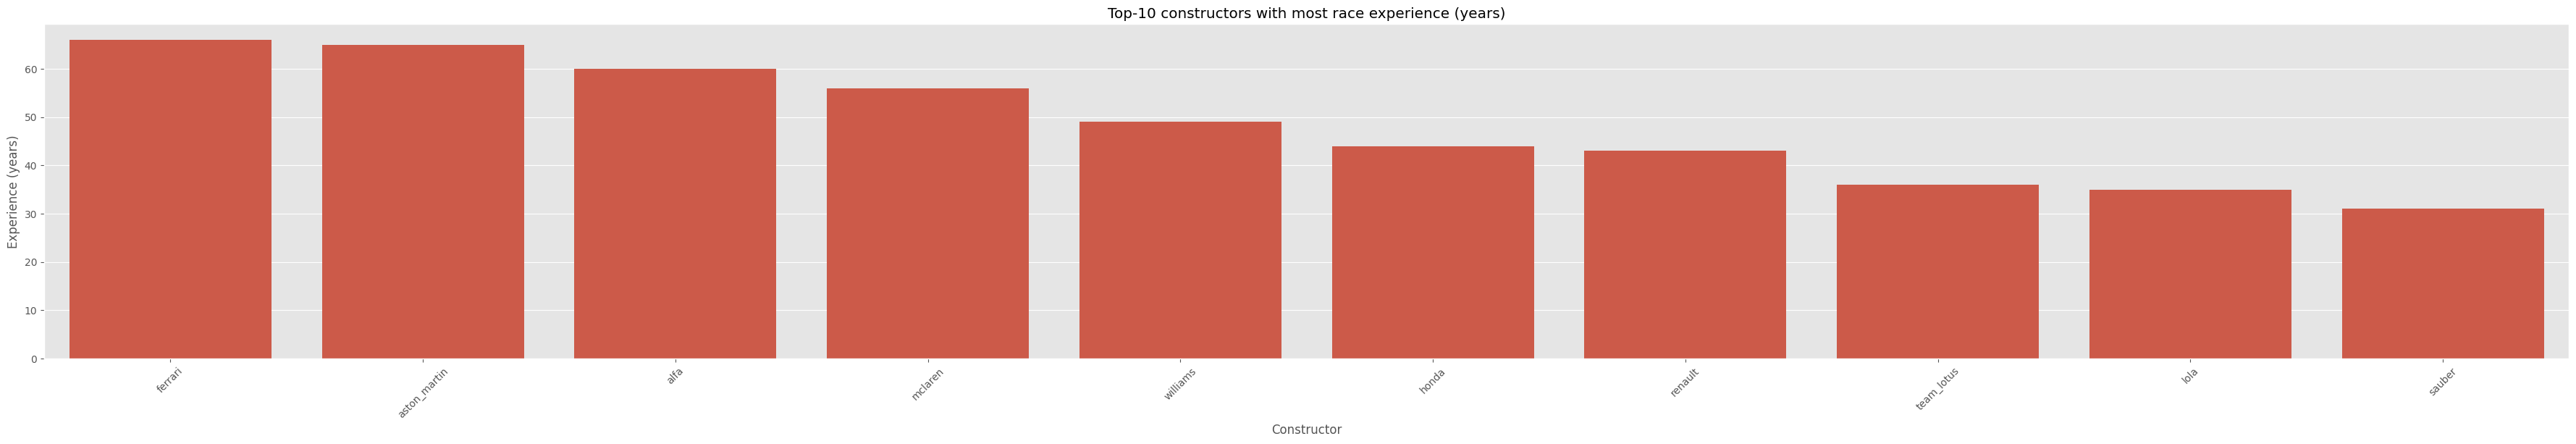

In [15]:
# EDA for the Constructors table: key business insight - top-10 constructors with most race experience (years)

# Merge Constructor Standings with Constructors and races to retrieve race season
df_exp = pd.merge(df_cstr_standings, df_cstr, on='constructorId', how='right')
df_exp = pd.merge(df_exp, df_races, on='raceId', how='right')

# Convert race season to datetime datatype
df_exp['year'] = pd.to_datetime(df_exp['year'], format='%Y')

# Group races by Constructor to calculate min and max constructor race years
df_exp_grp = df_exp.groupby('constructorRef')['year'].agg(['min', 'max']).reset_index()

# Use min and max constructor race years to calc contstructor experience in years
df_exp_grp['exp_days'] = (df_exp_grp['max'] - df_exp_grp['min']).dt.days
df_exp_grp['exp_yrs'] = (df_exp_grp['max'] - df_exp_grp['min']).dt.days // 365

# Sort constructors by experience and filter for top-10 only
df_exp_grp_sorted = df_exp_grp.sort_values(by='exp_yrs', ascending=False)
df_exp_top_10 = df_exp_grp_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(45, 6))
sns.barplot(x='constructorRef', y='exp_yrs', data=df_exp_top_10)
plt.title('Top-10 constructors with most race experience (years)')
plt.xlabel('Constructor')
plt.ylabel('Experience (years)')
plt.xticks(rotation=45)
plt.show()

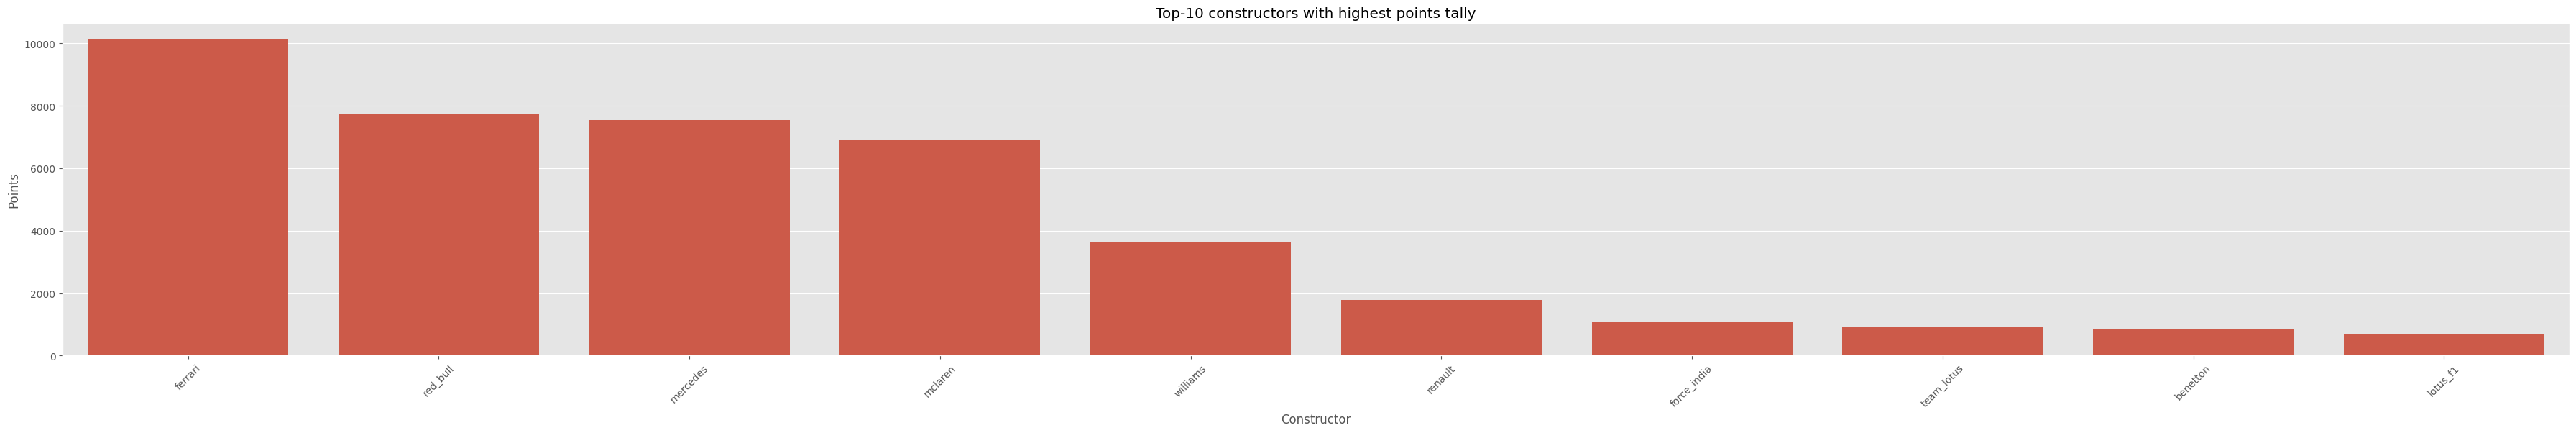

In [16]:
# EDA for the Constructors table: key business insight - top-10 constructors with highest points tally

# Merge Constructor Results with Constructors to retrieve constructor ref
df_pts = pd.merge(df_cstr_results, df_cstr, on='constructorId', how='right')

# Group points by constructor ref to calc total points
df_pts_grp = df_pts.groupby('constructorRef')['points'].sum().reset_index()

# Sort constructors by total points and filter for top-10 only
df_pts_grp_sorted = df_pts_grp.sort_values(by='points', ascending=False)
df_pts_top_10 = df_pts_grp_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(45, 6))
sns.barplot(x='constructorRef', y='points', data=df_pts_top_10)
plt.title('Top-10 constructors with highest points tally')
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

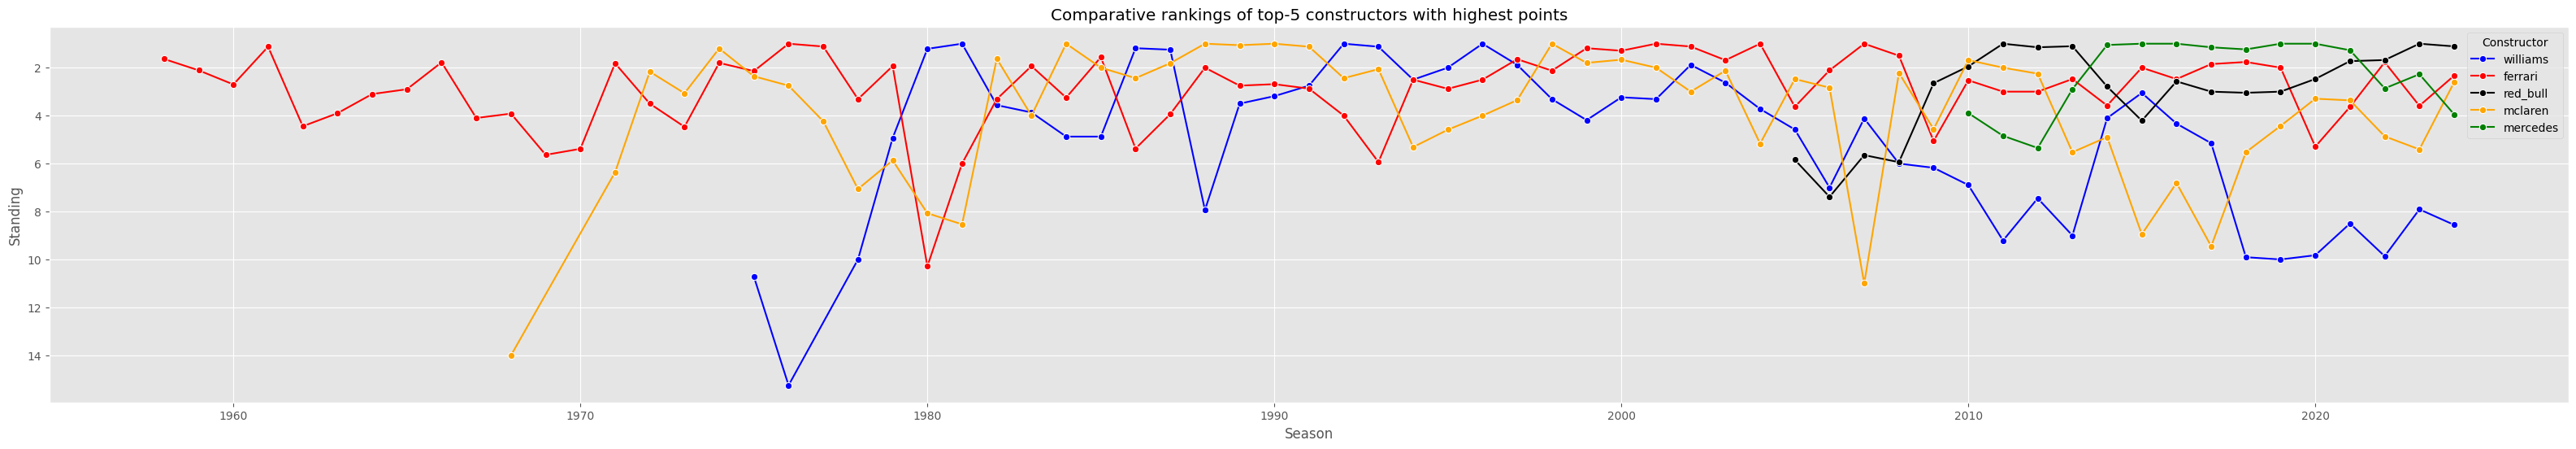

In [17]:
# EDA for the Constructors table: key business insight - comparative rankings of top-5 constructors with highest points

# Merge constructor standings with constructor references
df_cstr_rank = pd.merge(df_cstr_standings, df_cstr, on='constructorId', how='right')
df_cstr_rank = pd.merge(df_cstr_rank, df_races, on='raceId', how='right')

# Filter for the top constructors based on total points earnt across all seassons
# TODO: Replace hard coded constructor Refs with array of top-5 constructor Refs
df_top_cstr_rank = df_cstr_rank[df_cstr_rank['constructorRef'].isin(['ferrari', 'red_bull', 'mercedes', 'mclaren', 'williams'])]

# Define constructor team colours
cstr_colors = {
    'ferrari': 'red',
    'red_bull': 'black',
    'mercedes': 'green',
    'mclaren': 'orange',
    'williams': 'blue'
}

# Plot line plot
plt.figure(figsize=(40, 6))
sns.lineplot(x='year', y='position', hue='constructorRef', data=df_top_cstr_rank, marker='o', palette=cstr_colors, errorbar=None)
plt.title('Comparative rankings of top-5 constructors with highest points')
plt.xlabel('Season')
plt.ylabel('Standing')
plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.legend(title='Constructor')
plt.show()

In [18]:
# EDA for the Constructors table: key business insight - comparative rankings of top-5 constructors with highest points in F1 history - data quality check for merged dataframe?
print(df_top_cstr_rank.isna().sum())
print(df_top_cstr_rank.nunique)

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
constructorRef            0
name_x                    0
nationality               0
url_x                     0
year                      0
round                     0
circuitId                 0
name_y                    0
date                      0
time                      0
url_y                     0
fp1_date                  0
fp1_time                  0
fp2_date                  0
fp2_time                  0
fp3_date                  0
fp3_time                  0
quali_date                0
quali_time                0
sprint_date               0
sprint_time               0
dtype: int64
<bound method DataFrame.nunique of        constructorStandingsId  raceId  constructorId  points  position  \
1                      4041.0     1.0            3.0     3.0       4.0   
4                   

##### *Data quality notes: No missing values for merged dataframe: df_top_cstr_rank for above analysis.

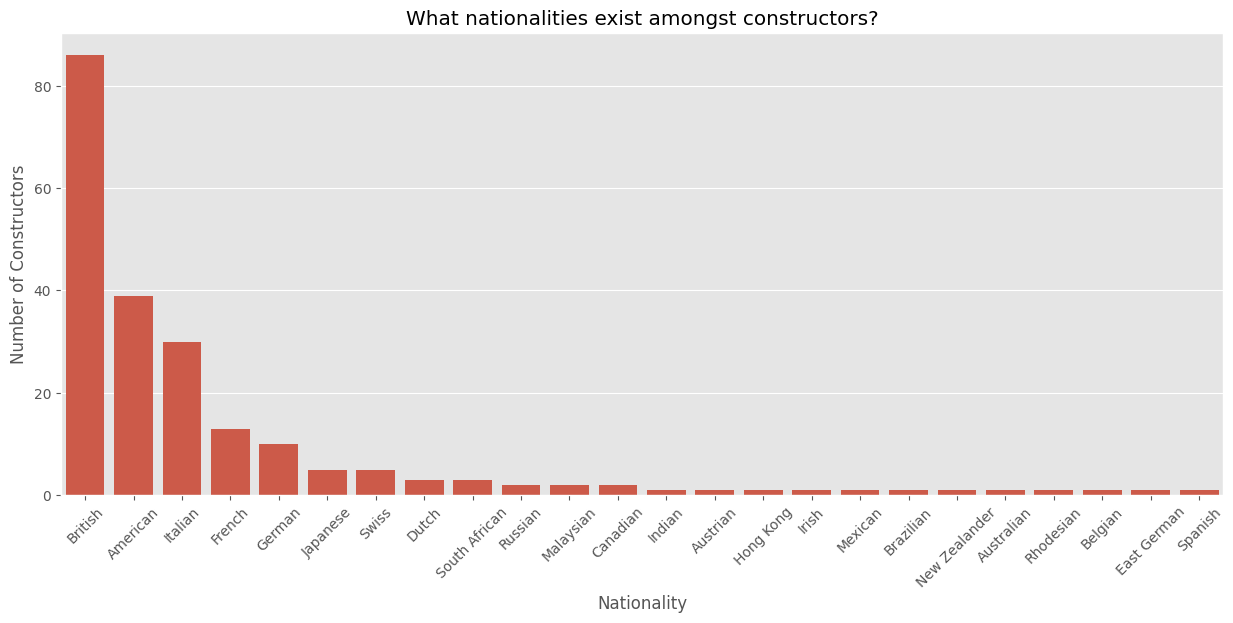

In [19]:
# EDA for the Constructors table: key businesss insight - what nationalities exist amongst constructors?

# Create count of number of nationalities by country sorted from largest to smallest
df_nat_count = df_cstr['nationality'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=df_nat_count.index, y=df_nat_count.values)
plt.title('What nationalities exist amongst constructors?')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.xticks(rotation=45)
plt.show()

### EDA_UA04 - Univariate Analysis for Races (Schedule) Table
- Some of the columns did not have have the correct datatype and needed to be fixed.
- TODO: There are missing values for date and times columns for the race itself, qualiying round 1, round 2, round (and sprint races, which were introduced in 2021) which needed to be replaced as well as correcting the datatype format to that of date / time.
- The change in the number of grand prix races per season is an indication of the how F1 has changed over the years.
- The number of grand prix races has increased nearly trebled since 1950 but still continues to change in the modern era.
- Circuit configurations have regularly changed over the years e.g. the circuit at Silverstone for the British GRand Prix (Source: Wikipedia, Development history of Silverstone Circuit, https://en.wikipedia.org/wiki/Development_history_of_Silverstone_Circuit#Recent_developments).
- If using race lap times data e.g. lap-times, qualifying-times, etc as a variable in a predictive model then results may not be correct due due these circuit configuration changes.

In [20]:
# EDA for Races dataset: structure of the data - summary statistics
stats = df_races.describe()
print(df_races.shape), print(df_races), print(stats)

(1125, 18)
      raceId  year  round  circuitId                    name        date  \
0          1  2009      1          1   Australian Grand Prix  2009-03-29   
1          2  2009      2          2    Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17      Chinese Grand Prix  2009-04-19   
3          4  2009      4          3      Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4      Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                     ...         ...   
1120    1140  2024     20         32  Mexico City Grand Prix  2024-10-27   
1121    1141  2024     21         18    São Paulo Grand Prix  2024-11-03   
1122    1142  2024     22         80    Las Vegas Grand Prix  2024-11-23   
1123    1143  2024     23         78        Qatar Grand Prix  2024-12-01   
1124    1144  2024     24         24    Abu Dhabi Grand Prix  2024-12-08   

          time                                                url    fp1_dat

(None, None, None)

In [21]:
# EDA for Races dataset: quality of the data - check datatypes
df_races.dtypes

raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

In [22]:
# EDA for Races dataset: quality of the data - fix datatypes

# Replace missing values ('\N') with NaN & for numerical or datetime columns
df_races['date'] = pd.to_datetime(df_races['date'])

df_races['time'] = df_races['time'].replace('\\N', np.nan)
df_races['time'] = pd.to_datetime(df_races['time'], format='%H:%M:%S', errors='coerce')

df_races['fp1_date'] = df_races['fp1_date'].replace('\\N', np.nan)
df_races['fp1_date'] = pd.to_datetime(df_races['fp1_date'], format='%H:%M:%S', errors='coerce')

df_races['fp1_time'] = df_races['fp1_time'].replace('\\N', np.nan)
df_races['fp1_time'] = pd.to_datetime(df_races['fp1_time'], format='%H:%M:%S', errors='coerce')

df_races['fp2_date'] = df_races['fp2_date'].replace('\\N', np.nan)
df_races['fp2_date'] = pd.to_datetime(df_races['fp2_date'], format='%H:%M:%S', errors='coerce')

df_races['fp2_time'] = df_races['fp2_time'].replace('\\N', np.nan)
df_races['fp2_time'] = pd.to_datetime(df_races['fp2_time'], format='%H:%M:%S', errors='coerce')

df_races['fp3_date'] = df_races['fp3_date'].replace('\\N', np.nan)
df_races['fp3_date'] = pd.to_datetime(df_races['fp3_date'], format='%H:%M:%S', errors='coerce')

df_races['fp3_time'] = df_races['fp3_time'].replace('\\N', np.nan)
df_races['fp3_time'] = pd.to_datetime(df_races['fp3_time'], format='%H:%M:%S', errors='coerce')

df_races['quali_date'] = df_races['quali_date'].replace('\\N', np.nan)
df_races['quali_date'] = pd.to_datetime(df_races['quali_date'], format='%H:%M:%S', errors='coerce')

df_races['quali_time'] = df_races['quali_time'].replace('\\N', np.nan)
df_races['quali_time'] = pd.to_datetime(df_races['quali_time'], format='%H:%M:%S', errors='coerce')

df_races['sprint_date'] = df_races['sprint_date'].replace('\\N', np.nan)
df_races['sprint_date'] = pd.to_datetime(df_races['sprint_date'], format='%H:%M:%S', errors='coerce')

df_races['sprint_time'] = df_races['sprint_time'].replace('\\N', np.nan)
df_races['sprint_time'] = pd.to_datetime(df_races['sprint_time'], format='%H:%M:%S', errors='coerce')

In [23]:
# EDA for Races dataset: quality of the data - check missing values
print(df_races.isna().sum())
print(df_races.nunique)

raceId            0
year              0
round             0
circuitId         0
name              0
date              0
time            731
url               0
fp1_date       1125
fp1_time       1057
fp2_date       1125
fp2_time       1057
fp3_date       1125
fp3_time       1072
quali_date     1125
quali_time     1057
sprint_date    1125
sprint_time    1110
dtype: int64
<bound method DataFrame.nunique of       raceId  year  round  circuitId                    name       date  \
0          1  2009      1          1   Australian Grand Prix 2009-03-29   
1          2  2009      2          2    Malaysian Grand Prix 2009-04-05   
2          3  2009      3         17      Chinese Grand Prix 2009-04-19   
3          4  2009      4          3      Bahrain Grand Prix 2009-04-26   
4          5  2009      5          4      Spanish Grand Prix 2009-05-10   
...      ...   ...    ...        ...                     ...        ...   
1120    1140  2024     20         32  Mexico City Grand Prix 2024-1

In [24]:
# EDA for Races dataset: key business insight - top-30 most raced circuits?

# Create count of number of races by circuit name
df_circ_count = df_races['name'].value_counts().sort_values(ascending=False)

# Filter for top-30 circuits
df_circ_count_top_10 = df_races['name'].value_counts().sort_values(ascending=False).head(30)

# Plot bar chart
plt.figure(figsize=(35, 6))
sns.barplot(x=df_circ_count_top_10.index, y=df_circ_count_top_10.values)
plt.title('Top-30 most raced circuits')
plt.xlabel('Circuit')
plt.ylabel('Number of circuits')
plt.xticks(rotation=45)
plt.show()

In [25]:
# EDA for Races dataset: key business insight - how many races have there been per season?

# Create count of number of races per season
df_season_count = df_races['year'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(35, 6))
sns.barplot(x=df_season_count.index, y=df_season_count.values)
plt.title('How many races have there been per season?')
plt.xlabel('Season')
plt.ylabel('Number of races')
plt.xticks(rotation=45)
plt.show()

### EDA_UA05 - Univariate Analysis for Driver Standings & Driver Tables
- Some columns did not have the correct datatype and needed to be fixed.
- There are missing values for driver 'number'. This is because drivers who left F1 had their number reserved for 2 seasons only and began to be re-assigned in the 1970s (Source: Williamsn Racing, Every iconic F1 car ran an iconic number - here is the history of driver numbers in Formula 1, https://www.williamsf1.com/posts/b0a21eb2-dacc-4831-ab49-c5f821e28af9/an-introduction-to-driver-numbers-in-formula-1). Therefore, the driverRef variable will be used instead throughout this EDA given that it is unique to each driver and does not contain any missin values.
- The top-5 driver nationalities are the same as the top-5 driver constructor (see above).
- Most drivers start their first race between the age of 25 to 33 years of age. Most drivers start their last race betweeen the age of 28 to 37 years of age. 
- Most drivers win between the ages of 27 and 34 years of age across all seasons.
- In the earlier years of F1, driver averge drive 'age' was significatnly higher than it is in the modern era. The average driver age has consistently decreased over time.

In [26]:
# EDA for Driver Standings dataset: structure of the data - summary statistics
stats = df_drv_standings.describe()
print(df_drv_standings.shape), print(df_drv_standings), print(stats)

(34724, 7)
       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
34719              73081    1138       842     8.0        15           15   
34720              73082    1138       822     0.0        22           22   
34721              73083    1138       858     0.0        21           21   
34722              73084    1138       860     7.0        16           16   
34723              73085    1138       861     4.0        19           19   

       wins  
0         1  
1         0  
2         0  
3       

(None, None, None)

In [27]:
# EDA for Driver Standings: quality of the data - check datatypes
df_drv_standings.dtypes

driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object

In [28]:
# EDA for Driver Standings: quality of the points & position variables - check uniqueness
df_drv_standings['position'].unique(), df_drv_standings['points'].unique()

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  27,
         26,  28,  29,  30,  31,  33,  32,  34,  36,  35,  38,  39,  37,
         45,  41,  46,  42,  40,  43,  44,  47,  49,  48,  51,  50,  52,
         53,  55,  54,  57,  56,  58,  59,  61,  60,  62,  66,  65,  63,
         64,  69,  68,  67,  73,  72,  71,  70,  75,  74,  77,  76,  78,
         83,  81,  80,  88,  87,  84,  82,  86,  85,  79,  91,  90,  89,
         92,  93,  94,  95,  96,  97,  98, 103, 102, 101,  99, 100, 104,
        108, 107, 105, 106]),
 array([1.000e+01, 8.000e+00, 6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.400e+01, 1.100e+01, 0.000e+00, 1.600e+01,
        7.000e+00, 1.900e+01, 2.000e+01, 2.900e+01, 9.000e+00, 1.800e+01,
        2.800e+01, 3.500e+01, 2.400e+01, 3.800e+01, 1.500e+01, 3.200e+01,
        3.400e+01, 4.200e+01, 1.200e+01, 4.300e+01, 4.600e+01, 4.800e+01,
        3.600e+0

In [29]:
# EDA for Driver Standings: quality of points & position variables - check missing values
print(df_drv_standings.isna().sum())
print(df_drv_standings.nunique)

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64
<bound method DataFrame.nunique of        driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
34719              73081    1138       842     8.0        15           15   
34720              73082    1138       822     0.0        22           22   
34721              73083    1138       858     0.0        21           21   
34722              73

In [30]:
# EDA for Drivers dataset: structure of the data & quality of the data - summary statistics & check uniqueness / missing values / datatype / format
stats = df_drv.describe()
print(df_drv.shape), print(df_drv), print(stats)

# Check 'number' column for missing values
df_drv['number'].unique

# Check 'driverRef' column for missing values
df_drv['driverRef'].unique

# Replace missing values ('\N') in 'number' column with 'NaN' and convert to numeric datatype
df_drv['number'] = df_drv['number'].replace('\\N', pd.NA)
df_drv['number'] = pd.to_numeric(df_drv['number'], errors='coerce')

# Fix datatypes for numerical or datetime columns
df_drv['dob'] = pd.to_datetime(df_drv['dob'])

(860, 9)
     driverId   driverRef number code  forename     surname         dob  \
0           1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1           2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2           3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3           4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4           5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   
..        ...         ...    ...  ...       ...         ...         ...   
855       857     piastri     81  PIA     Oscar     Piastri  2001-04-06   
856       858    sargeant      2  SAR     Logan    Sargeant  2000-12-31   
857       859      lawson     40  LAW      Liam      Lawson  2002-02-11   
858       860     bearman     38  BEA    Oliver     Bearman  2005-05-08   
859       861   colapinto     43  COL    Franco   Colapinto  2003-05-27   

       nationality                                             url  
0          British   

In [31]:
# EDA for Drivers: quality of the data - check datatypes
df_drv.dtypes

driverId                int64
driverRef              object
number                float64
code                   object
forename               object
surname                object
dob            datetime64[ns]
nationality            object
url                    object
dtype: object

In [32]:
# EDA for Drivers dataset: quality of the data - check missing values
print(df_drv.isna().sum())
print(df_drv.nunique)

driverId         0
driverRef        0
number         802
code             0
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64
<bound method DataFrame.nunique of      driverId   driverRef  number code  forename     surname        dob  \
0           1    hamilton    44.0  HAM     Lewis    Hamilton 1985-01-07   
1           2    heidfeld     NaN  HEI      Nick    Heidfeld 1977-05-10   
2           3     rosberg     6.0  ROS      Nico     Rosberg 1985-06-27   
3           4      alonso    14.0  ALO  Fernando      Alonso 1981-07-29   
4           5  kovalainen     NaN  KOV    Heikki  Kovalainen 1981-10-19   
..        ...         ...     ...  ...       ...         ...        ...   
855       857     piastri    81.0  PIA     Oscar     Piastri 2001-04-06   
856       858    sargeant     2.0  SAR     Logan    Sargeant 2000-12-31   
857       859      lawson    40.0  LAW      Liam      Lawson 2002-02-11   
858       860     bearman    38

In [33]:
# EDA for Drivers dataset: key business insight - how many drivers have there been by nationality?

# Create count of driver nationalities
df_nat_count = df_drv['nationality'].value_counts().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x=df_nat_count.index, y=df_nat_count.values)
plt.title('How many drivers have there been by nationality?')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.show()

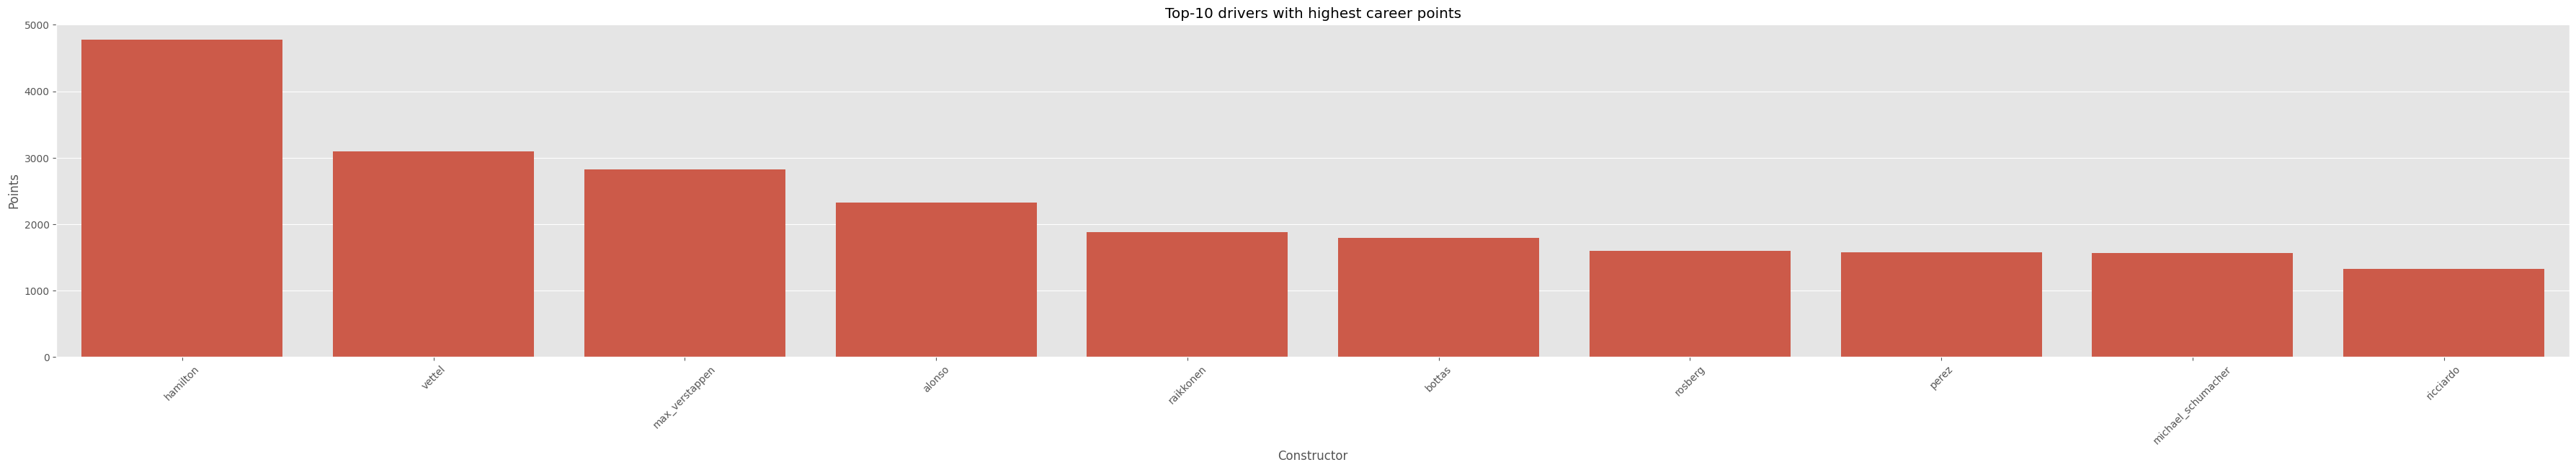

In [34]:
# EDA for Drivers dataset: key business insight - top-10 drivers with highest career points

# Merge results with drivers to get 'driverRef'
df_pts = pd.merge(df_results, df_drv, on='driverId', how='right')

# Use 'driverRef' to calc total points
df_pts_grp = df_pts.groupby('driverRef')['points'].sum().reset_index()

# Remove drivers with no points
df_pts_grp_filtered = df_pts_grp[df_pts_grp['points'] > 0]

# Sorted from largest to smallest by points
df_pts_grp_sorted = df_pts_grp_filtered.sort_values(by='points', ascending=False)

# Filter for the top 10 drivers
df_top_drv = df_pts_grp_sorted.head(10)

# Plot bar chart
plt.figure(figsize=(45, 6))
sns.barplot(x='driverRef', y='points', data=df_top_drv)
plt.title('Top-10 drivers with highest career points')
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

In [35]:
# EDA for Drivers dataset: key business insight - top-10 drivers with highest career points? - data quality check for merged dataframe?
print(df_top_drv.isna().sum())
print(df_top_drv.nunique)

driverRef    0
points       0
dtype: int64
<bound method DataFrame.nunique of               driverRef  points
344            hamilton  4777.5
811              vettel  3098.0
520      max_verstappen  2820.5
20               alonso  2321.0
650           raikkonen  1873.0
102              bottas  1788.0
687             rosberg  1594.5
608               perez  1578.0
539  michael_schumacher  1566.0
671           ricciardo  1320.0>


##### *Data quality notes: No missing values for merged dataframe: df_top_drv for above analysis.

In [36]:
# EDA for Drivers dataset: key business insight - comparative rankings of top-10 drivers with highest career points

# Merge constructor standings with driver references
df_drv_rank = pd.merge(df_drv_standings, df_drv, on='driverId', how='right')
df_drv_rank = pd.merge(df_drv_rank, df_races, on='raceId', how='right')

# Use driver ref to filter for the top drivers based on total points earnt across all seassons
# TODO: Change from hard-coded 'driverRef' to ensure it is dynamically calculated
df_top_drv_rank = df_drv_rank[df_drv_rank['driverRef'].isin(['hamilton', 'vettel', 'max_verstappen', 'alonso', 'raikkonen', 'bottas', 'rosberg', 'perez', 'michael_schumacheer', 'ricciardo'])]

# Plot line plot
plt.figure(figsize=(40, 6))
sns.lineplot(x='year', y='position', hue='driverRef', data=df_top_drv_rank, marker='o', errorbar=None)
plt.title('comparative rankings of top-10 drivers with highest career points')
plt.xlabel('Season')
plt.ylabel('Standing')
plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.legend(title='Driver')
plt.show()

In [37]:
# EDA for Drivers dataset: key business insight - comparative rankings of top-10 drivers with highest points in F1 history - data quality check for merged dataframe?
print(df_top_drv_rank.isna().sum())
print(df_top_drv_rank.nunique)

driverStandingsId       0
raceId                  0
driverId                0
points                  0
position                0
positionText            0
wins                    0
driverRef               0
number                  0
code                    0
forename                0
surname                 0
dob                     0
nationality             0
url_x                   0
year                    0
round                   0
circuitId               0
name                    0
date                    0
time                  116
url_y                   0
fp1_date             2593
fp1_time             2211
fp2_date             2593
fp2_time             2211
fp3_date             2593
fp3_time             2284
quali_date           2593
quali_time           2211
sprint_date          2593
sprint_time          2520
dtype: int64
<bound method DataFrame.nunique of        driverStandingsId  raceId  driverId  points  position positionText  \
1                 8252.0     1.0       3.0 

##### *Data quality notes: No critical missing values for merged dataframe: df_top_drv_rank for above analysis (Missing values only exist for redundant columns: time, fp1_date, fp1_time, fp2_date, fp2_time, fp3_date, fp3_time, quali_date, quali_time, sprint_date, sprint_time not relevant for above analysis).

In [38]:
# EDA for Drivers dataset: key business insight - which drivers have the highest average season rank (lower rank number is better)?

# Merge driver standings with drivers to get 'driverRef'
df_drv_stdg = pd.merge(df_drv_standings, df_drv, on='driverId', how='right')

# Use 'driverRef' to calc average season rank for each driver
df_avg_rank = df_drv_stdg.groupby('driverRef')['position'].mean().reset_index()

# Sort from smallest to largest by average rank (since lower rank is better)
df_avg_rank_sorted = df_avg_rank.sort_values(by='position')

# Filter for the top 30 drivers with the highest average season rank
df_top_drv_avg_rank = df_avg_rank_sorted.head(30)

# Plot bar chart
plt.figure(figsize=(30, 6))
sns.barplot(x='driverRef', y='position', data=df_top_drv_avg_rank)
plt.title('Which drivers have the highest average season rank (lower rank number is better)?')
plt.xlabel('Driver')
plt.ylabel('Average Season Rank')
plt.xticks(rotation=45)
plt.show()

In [39]:
# EDA for Drivers dataset: key business insight - which drivers have the highest average season rank? - data quality check for merged dataframe?
print(df_top_drv_avg_rank.isna().sum())
print(df_top_drv_avg_rank.nunique)

driverRef    0
position     0
dtype: int64
<bound method DataFrame.nunique of               driverRef  position
344            hamilton  2.977143
643               prost  3.509804
753             stewart  3.778846
520      max_verstappen  4.221675
539  michael_schumacher  4.325879
247              fangio  5.223881
554             montoya  5.247525
248              farina  5.270833
381               hulme  5.338983
245             fagioli  5.666667
168               clark  5.813953
811              vettel  5.839465
729               senna  5.920000
462             leclerc  6.125874
687             rosberg  6.766990
341            hakkinen  6.814815
581              norris  6.819672
650           raikkonen  6.864023
180           coulthard  7.255230
20               alonso  7.417500
457               lauda  7.550802
665           reutemann  7.575758
651     ralf_schumacher  7.729282
102              bottas  7.792531
627              piquet  7.851675
532             mclaren  7.991935
194 

##### *Data quality notes: No missing values for merged dataframe: df_top_drv_avg_rank for above analysis.

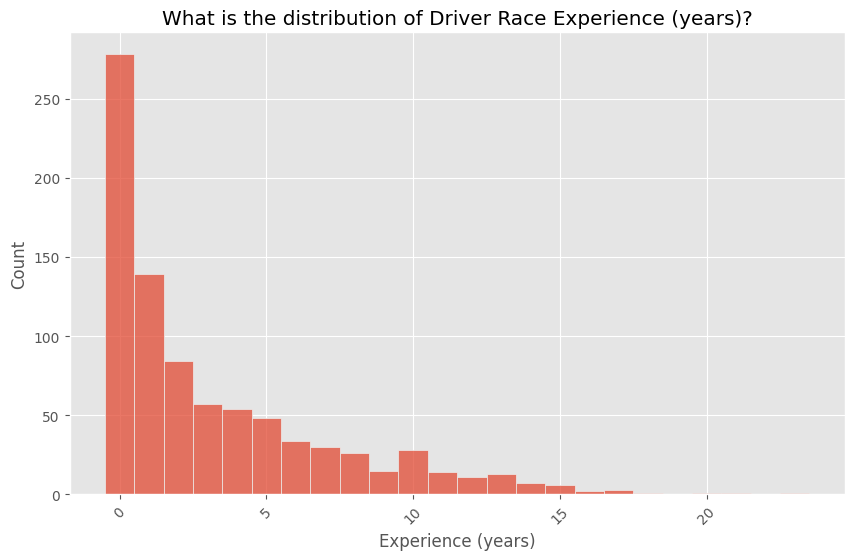

In [40]:
# EDA for Drivers dataset: key business insight - what is the distribution of driver experience (in years)?

# Merge driver standings with drivers and races to retrieve 'raceID'
df_exp1 = pd.merge(df_drv_standings, df_drv, on='driverId', how='left')
df_exp2 = pd.merge(df_exp1, df_races, on='raceId', how='right')

# Use 'RaceID' to retrieve 'year' and convert race season to datetime datatype
df_exp2['year'] = pd.to_datetime(df_exp2['year'], format='%Y')

# Use race season to calc driver min and max race years
df_exp_grp = df_exp2.groupby('driverId')['year'].agg(['min', 'max'])

# Feature engineeering - use min and max race years to calc driver experience
df_exp_grp['exp_years'] = (df_exp_grp['max'] - df_exp_grp['min']).dt.days // 365

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_exp_grp['exp_years'], discrete=True)
plt.title('What is the distribution of Driver Race Experience (years)?')
plt.xlabel('Experience (years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Feature engineering - add driver 'exp_yers' back to driver dataset. 
df_drv = pd.merge(df_drv, df_exp_grp[['exp_years']], on='driverId', how='left')

In [41]:
# EDA for Drivers dataset: key business insight - what is the distribution of driver experience (in years)? - data quality check for merged dataframe?
print(df_exp_grp.isna().sum())
print(df_exp_grp.nunique)

min          0
max          0
exp_years    0
dtype: int64
<bound method DataFrame.nunique of                 min        max  exp_years
driverId                                 
1.0      2007-01-01 2024-01-01         17
2.0      2000-01-01 2011-01-01         11
3.0      2006-01-01 2016-01-01         10
4.0      2001-01-01 2024-01-01         23
5.0      2007-01-01 2013-01-01          6
...             ...        ...        ...
857.0    2023-01-01 2024-01-01          1
858.0    2023-01-01 2024-01-01          1
859.0    2023-01-01 2023-01-01          0
860.0    2024-01-01 2024-01-01          0
861.0    2024-01-01 2024-01-01          0

[853 rows x 3 columns]>


##### *Data quality notes: No missing values for merged dataframe: df_exp_grp for above analysis.

In [42]:
# EDA for Drivers dataset: key business insight - What is the distribution of driver age when they first raced versus age when they last raced (in years)?

# Merge driver standings with drivers and races to retrieve dob
df_age1 = pd.merge(df_drv_standings, df_drv, on='driverId', how='right')
df_age2 = pd.merge(df_age1, df_races, on='raceId', how='right')

# Use dob to calculate driver date of first race & driver date of last race
df_age_grp = df_age2.groupby('driverId').agg(fr_date=('date', 'min'), lr_date=('date', 'max'), dob=('dob', 'first')).reset_index()

# Fix datatypes for numerical or datetime columns
df_age_grp['fr_date'] = pd.to_datetime(df_age_grp['fr_date'])
df_age_grp['lr_date'] = pd.to_datetime(df_age_grp['lr_date'])

# Feature engineering - use driver dob to calculate driver age at first race & age at last race
df_age_grp['age_first_race'] = (df_age_grp['fr_date'] - df_age_grp['dob']).dt.days // 365
df_age_grp['age_last_race'] = (df_age_grp['lr_date'] - df_age_grp['dob']).dt.days // 365

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_age_grp['age_first_race'], alpha=0.5, label='Age at First Race')
plt.hist(df_age_grp['age_last_race'], alpha=0.5, label='Age at Last Race')
plt.title('What is the distribution of driver age when they first raced race vs. when they last raced (years)?')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

# Feature engineering - add age at first race & age at last race back to original dataset. 
df_drv = pd.merge(df_drv, df_age_grp, on='driverId', how='left')

In [43]:
# EDA for Drivers dataset: key business insight - what is the distribution of driver experience (in years)? - data quality check for merged dataframe?
print(df_age_grp.isna().sum())
print(df_age_grp.nunique)

driverId          0
fr_date           0
lr_date           0
dob               0
age_first_race    0
age_last_race     0
dtype: int64
<bound method DataFrame.nunique of      driverId    fr_date    lr_date        dob  age_first_race  age_last_race
0         1.0 2007-03-18 2024-09-22 1985-01-07              22             39
1         2.0 2000-03-12 2011-11-27 1977-05-10              22             34
2         3.0 2006-03-12 2016-11-27 1985-06-27              20             31
3         4.0 2001-03-04 2024-09-22 1981-07-29              19             43
4         5.0 2007-03-18 2013-11-24 1981-10-19              25             32
..        ...        ...        ...        ...             ...            ...
848     857.0 2023-03-05 2024-09-22 2001-04-06              21             23
849     858.0 2023-03-05 2024-09-22 2000-12-31              22             23
850     859.0 2023-08-27 2023-11-26 2002-02-11              21             21
851     860.0 2024-03-09 2024-09-22 2005-05-08      

##### *Data quality notes: No missing values for merged dataframe: df_age_grp for above analysis.

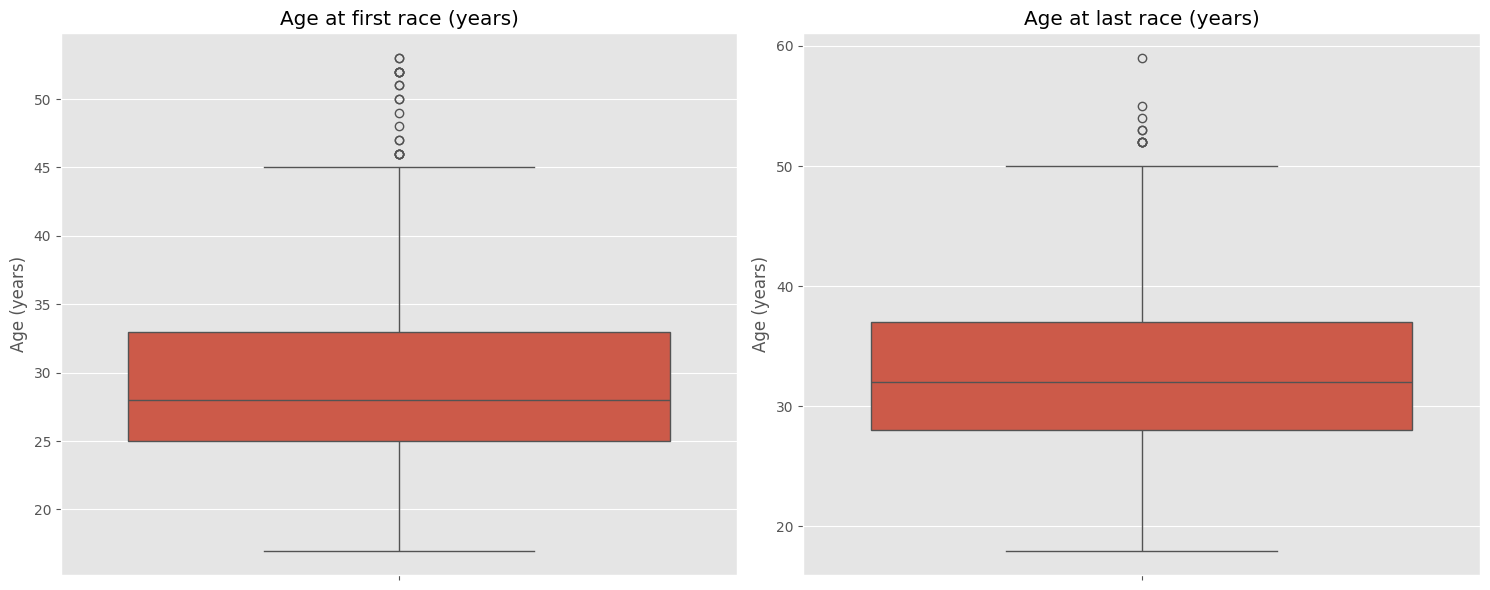

In [44]:
# EDA for Drivers dataset: key business insight - at what age do drivers start their first race versus last race (in years)?

# Set up fig space for 2 box plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for drv age at first race
sns.boxplot(data=df_age_grp, y='age_first_race', ax=axes[0])
axes[0].set_title('Age at first race (years)')
axes[0].set_ylabel('Age (years)')

# Box plot for drv age at last race
sns.boxplot(data=df_age_grp, y='age_last_race', ax=axes[1])
axes[1].set_title('Age at last race (years)')
axes[1].set_ylabel('Age (years)')

plt.tight_layout()
plt.show()

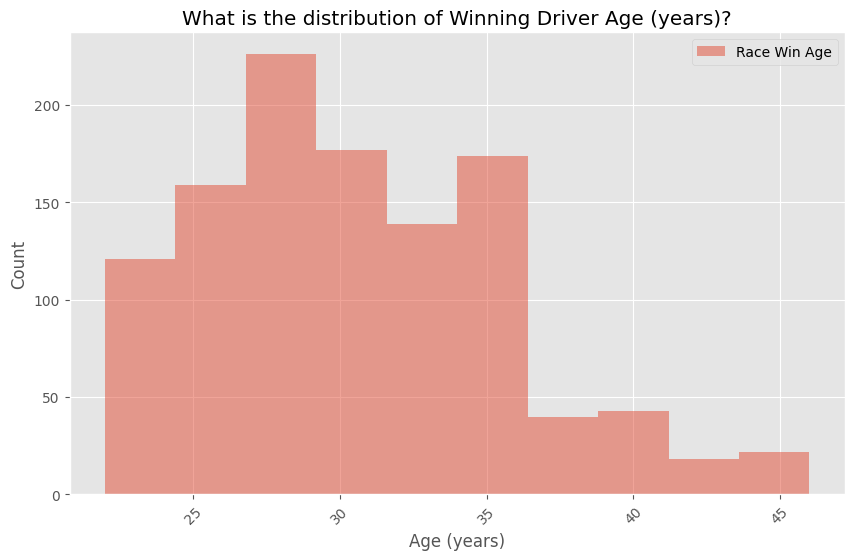

In [45]:
# EDA for Drivers dataset: key business insight - what is the distribution of winner driver age (in years)?

# Merge driver standings with drivers and races to retrieve dob for winning drivers
df_win_age1 = pd.merge(df_drv_standings[df_drv_standings['position'] == 1], df_drv, on='driverId', how='left')
df_win_age2 = pd.merge(df_win_age1, df_races, on='raceId', how='left')

# Ensure the date columns are in datetime format
df_win_age2['dob_x'] = pd.to_datetime(df_win_age2['dob_x'])
df_win_age2['date'] = pd.to_datetime(df_win_age2['date'])

# Use dob for winning drivers to calculate driver age at the time of the race
df_win_age2['race_age'] = (df_win_age2['date'] - df_win_age2['dob_x']).dt.days // 365
df_win_age2['race_age'] = df_win_age2['race_age'].astype(int)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_win_age2['race_age'].dropna(), bins=10, alpha=0.5, label='Race Win Age')
plt.title('What is the distribution of Winning Driver Age (years)?')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [46]:
# EDA for Drivers dataset: key business insight - what is the distribution of winner driver age (in years)? - data quality check for merged dataframe?
print(df_win_age2.isna().sum())
print(df_win_age2.nunique)

driverStandingsId       0
raceId                  0
driverId                0
points                  0
position                0
positionText            0
wins                    0
driverRef               0
number                733
code                    0
forename                0
surname                 0
dob_x                   0
nationality             0
url_x                   0
exp_years               0
fr_date                 0
lr_date                 0
dob_y                   0
age_first_race          0
age_last_race           0
year                    0
round                   0
circuitId               0
name                    0
date                    0
time                  731
url_y                   0
fp1_date             1119
fp1_time             1057
fp2_date             1119
fp2_time             1057
fp3_date             1119
fp3_time             1069
quali_date           1119
quali_time           1057
sprint_date          1119
sprint_time          1107
race_age    

##### *Data quality notes: No critical missing values for merged dataframe: df_win_age2 for above analysis (Missing values only exist for redundant column: number).

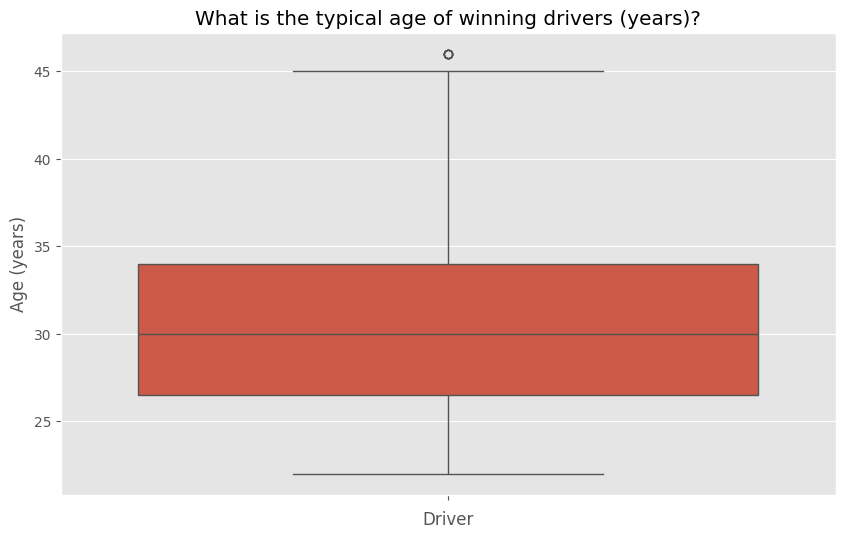

In [47]:
# EDA for Drivers dataset: key business insight - what is the typical age of winning drivers (years)?

# Plot box plot of driver age for race winners
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_win_age2, y='race_age')
plt.title('What is the typical age of winning drivers (years)?')
plt.xlabel('Driver')
plt.ylabel('Age (years)')
plt.xticks(rotation=45)
plt.show()

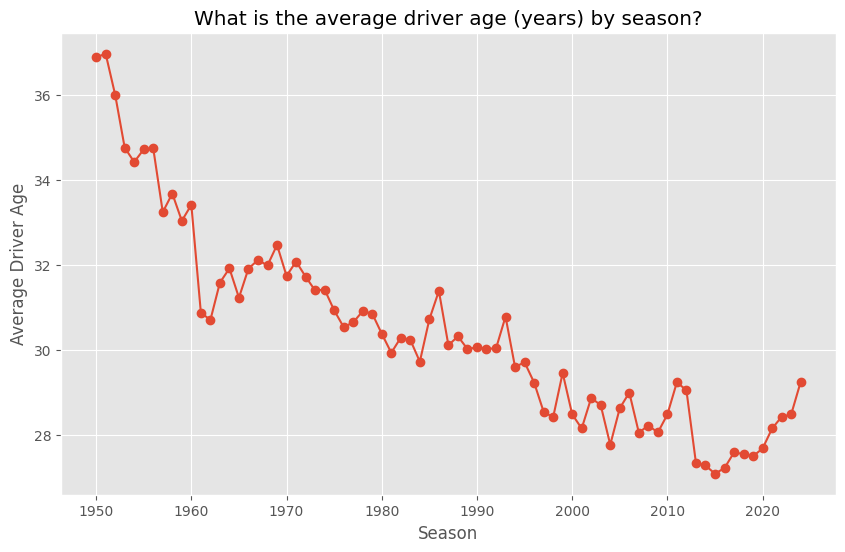

In [48]:
# EDA for Drivers dataset: key business insight - what is the average driver age (years) by season?

# Merge driver standings with drivers and races to retrieve 'dob'
df_avg_age1 = pd.merge(df_drv_standings, df_drv, on='driverId', how='left')
df_avg_age2 = pd.merge(df_avg_age1, df_races[['raceId', 'year', 'date']], on='raceId', how='left')

# Convert 'dob' and race 'date' to datetime
df_avg_age2['dob_x'] = pd.to_datetime(df_avg_age2['dob_x'])
df_avg_age2['date'] = pd.to_datetime(df_avg_age2['date'])

# Calculate driver age in each race
df_avg_age2['age'] = df_avg_age2['date'].dt.year - df_avg_age2['dob_x'].dt.year

# Feature engineering - group by year and calculate the average age of drivers
df_avg_age_per_season = df_avg_age2.groupby('year')['age'].mean()

# Line Plot
plt.figure(figsize=(10, 6))
df_avg_age_per_season.plot(kind='line', marker='o')
plt.xlabel('Season')
plt.ylabel('Average Driver Age')
plt.title('What is the average driver age (years) by season?')
plt.grid(True)
plt.show()

# Feature engineering - add age at back to original dataset. 
df_drv = pd.merge(df_drv, df_age_grp, on='driverId', how='left')

In [49]:
# EDA for Drivers dataset: key business insight - what is the average driver age (years) by season? - data quality check for merged dataframe?
print(df_avg_age2.isna().sum())
print(df_avg_age2.nunique)

driverStandingsId        0
raceId                   0
driverId                 0
points                   0
position                 0
positionText             0
wins                     0
driverRef                0
number               28064
code                     0
forename                 0
surname                  0
dob_x                    0
nationality              0
url                      0
exp_years                0
fr_date                  0
lr_date                  0
dob_y                    0
age_first_race           0
age_last_race            0
year                     0
date                     0
age                      0
dtype: int64
<bound method DataFrame.nunique of        driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3

##### *Data quality notes: No critical missing values for merged dataframe: df_avg_age2 for above analysis (Missing values only exist for redundant column: number).

### EDA_UA06 - Univariate Analysis for Pit-Stop Table
- The columns have the correct datatype.
- There are no missing values in the columns to be kept.
- Pit stop strategy has changed over the years. "Over time, pit stops began to change as safety techniques and technology evolved. Pit stops became faster in the 80s, and by the early 2000s, there were at least 19 crew members surrounding a vehicle during a pit stop." (Source: F1 Chronicle, Beyond The Pit Wall: Unlocking The Mastery Of Pit Stops In Formula 1, https://f1chronicle.com/analysis-of-the-pit-stop-times-in-formula-1/#:~:text=Over%20time%2C%20pit%20stops%20began%20to%20change%20as,massive%20drop%20in%20the%20length%20of%20pit%20stops).
- Pit stop strategy is one component of overall race strategy, which is determined by constructors on a race-by-race basis. Telemetary data is even used during the race itself to inform strategy whilst the race is in progress - this could be used to as a proxy for race strategy if publicly available.

In [50]:
# EDA for Pit Stops dataset: structure of the data - summary statistics
stats = df_pit_stops.describe()
print(df_pit_stops.shape), print(df_pit_stops), print(stats)

(11165, 7)
       raceId  driverId  stop  lap      time duration  milliseconds
0         841       153     1    1  17:05:23   26.898         26898
1         841        30     1    1  17:05:52   25.021         25021
2         841        17     1   11  17:20:48   23.426         23426
3         841         4     1   12  17:22:34   23.251         23251
4         841        13     1   13  17:24:10   23.842         23842
...       ...       ...   ...  ...       ...      ...           ...
11160    1138       842     1   37  21:06:04   31.509         31509
11161    1138       857     1   38  21:06:22   29.152         29152
11162    1138       817     2   46  21:20:58   29.066         29066
11163    1138       825     2   49  21:26:52   31.291         31291
11164    1138       817     3   58  21:40:58   29.653         29653

[11165 rows x 7 columns]
             raceId      driverId          stop           lap  milliseconds
count  11165.000000  11165.000000  11165.000000  11165.000000  1.116500

(None, None, None)

In [51]:
# EDA for Pit Stops dataset: quality of the data - check datatypes
df_pit_stops.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

In [52]:
# EDA for Pit Stops dataset: quality fo the data - check missing values
print(df_pit_stops.isna().sum())
print(df_pit_stops.nunique)

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64
<bound method DataFrame.nunique of        raceId  driverId  stop  lap      time duration  milliseconds
0         841       153     1    1  17:05:23   26.898         26898
1         841        30     1    1  17:05:52   25.021         25021
2         841        17     1   11  17:20:48   23.426         23426
3         841         4     1   12  17:22:34   23.251         23251
4         841        13     1   13  17:24:10   23.842         23842
...       ...       ...   ...  ...       ...      ...           ...
11160    1138       842     1   37  21:06:04   31.509         31509
11161    1138       857     1   38  21:06:22   29.152         29152
11162    1138       817     2   46  21:20:58   29.066         29066
11163    1138       825     2   49  21:26:52   31.291         31291
11164    1138       817     3   58  21:40:58   29.653         29653

[11165 ro

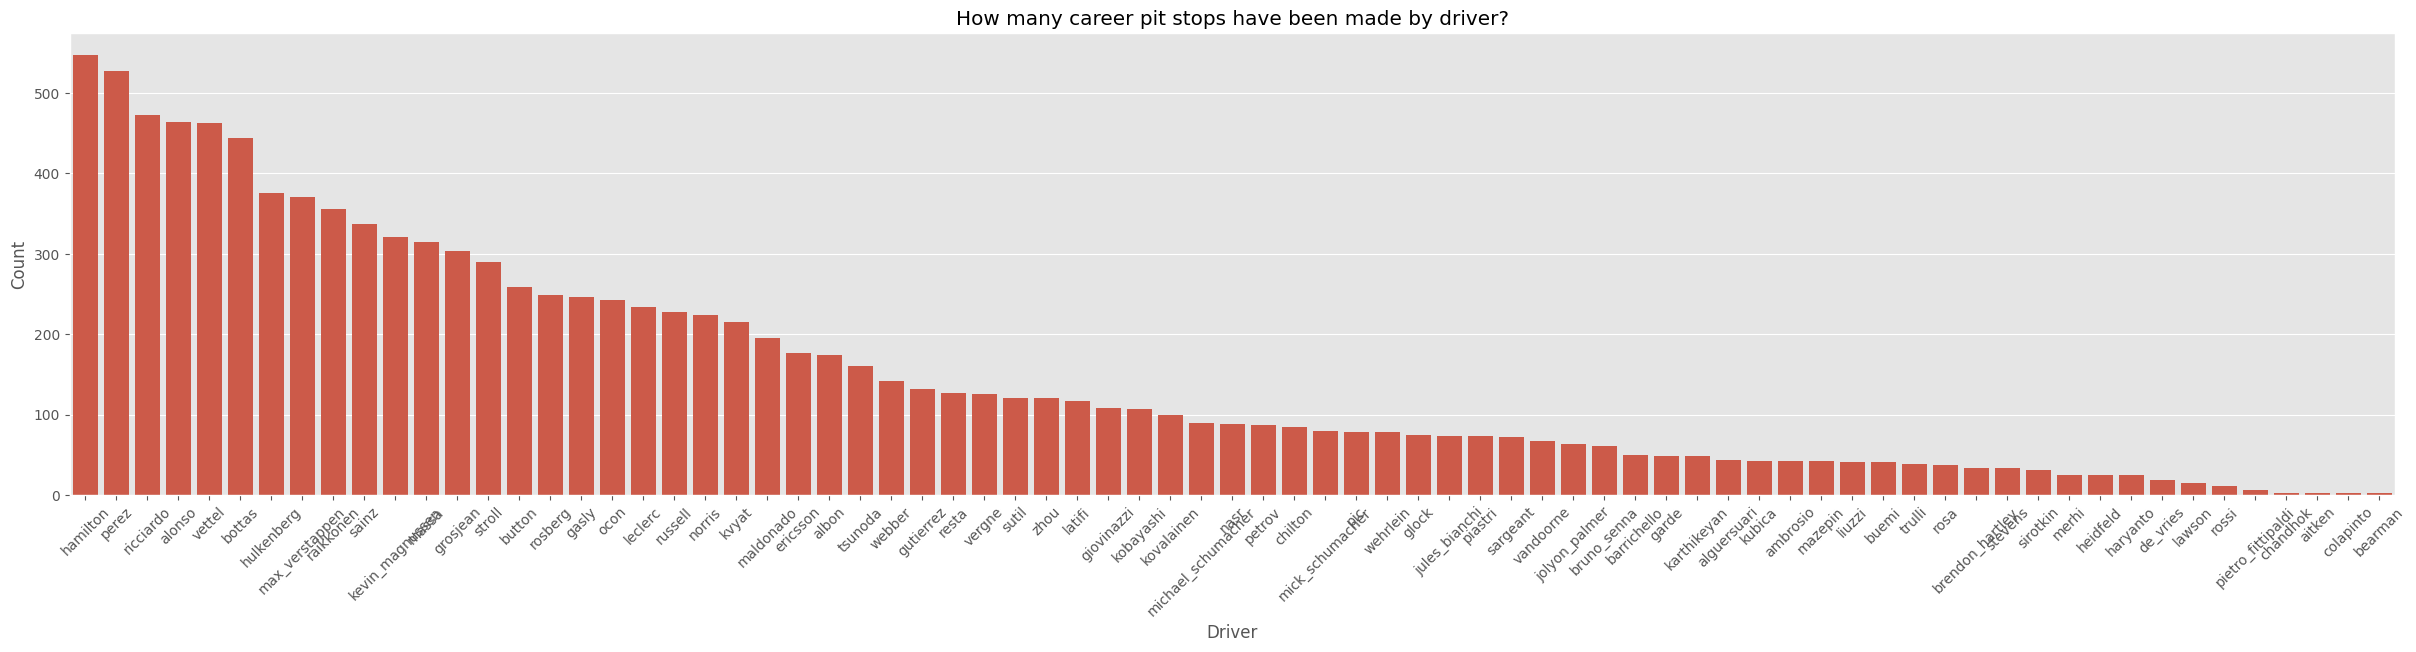

In [53]:
# EDA for Pit Stops dataset: key business insight - how many career pit stops have been made by driver?

# Merge pit stops with drivers and races to retrieve 'driverRef'
df_pit_stops = pd.merge(df_pit_stops, df_drv, on='driverId', how='left')
df_pit_stops = pd.merge(df_pit_stops, df_races[['raceId', 'year']], on='raceId', how='left')

# Use 'driverRef' to calc number of pit stops by driver
df_pit_stops_grp = df_pit_stops.groupby('driverRef').agg(pit_stop_count=('stop', 'count')).reset_index()

# Sort by largest to smallest
df_pit_stops_grp = df_pit_stops_grp.sort_values(by='pit_stop_count', ascending=False)

# Plot histogram
plt.figure(figsize=(30, 6))
sns.barplot(x='driverRef', y='pit_stop_count', data=df_pit_stops_grp)
plt.title('How many career pit stops have been made by driver?')
plt.xlabel('Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
# EDA for Pit Stops dataset: key business insight - how many pit stops have been made by driver? - data quality check for merged dataframe?
print(df_pit_stops_grp.isna().sum())
print(df_pit_stops_grp.nunique)

driverRef         0
pit_stop_count    0
dtype: int64
<bound method DataFrame.nunique of             driverRef  pit_stop_count
23           hamilton             547
49              perez             527
56          ricciardo             472
3              alonso             464
71             vettel             463
..                ...             ...
53  pietro_fittipaldi               6
12           chandhok               3
0              aitken               3
14          colapinto               3
6             bearman               2

[75 rows x 2 columns]>


##### *Data quality notes: No critical missing values for merged dataframe: df_pit_stops_grp for above analysis.

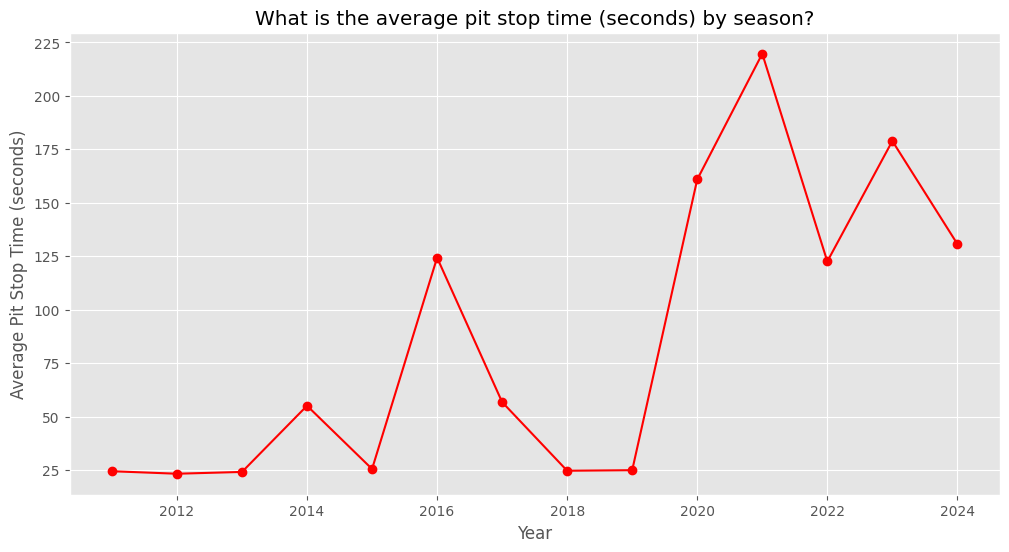

In [55]:
# EDA for Pit Stops dataset: key business insight - what is the average pit stop time (seconds) by season?

# Reformat pit stop times from milliseconds to seconds into a more human friendly format
df_pit_stops['pitStopTimeSeconds'] = df_pit_stops['milliseconds'] / 1000

# Calculate the average pit stop time for each year
df_avg_pit_stop_times = df_pit_stops.groupby('year')['pitStopTimeSeconds'].mean().reset_index()

# # Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(df_avg_pit_stop_times['year'], df_avg_pit_stop_times['pitStopTimeSeconds'], marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Average Pit Stop Time (seconds)')
plt.title('What is the average pit stop time (seconds) by season?')
plt.grid(True)
plt.show()

### EDA_UA07 - Univariate Analysis for (Race) Results Table
- The columns have the correct datatype.
- There are missing values for Position, Points and Grid that needed to be converted to a numeric data type.
- The points system has changed over the years. 
    - In 2003, the FIA revised the structore to the top eight finishers of each race and extended it again to include the first 10 Grand Prix race finishers in 2010. Each Grand Prix winner tallied 8 points from 1950 to 1960, 9 points from 1961 to 1990, 10 points betweeen 1991 and 2009, and 25 points since 2010 (Source: List of Formula One World Championship Points Scoring Systems, Wikipedia, https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems#:~:text=In%202003%2C%20the%20FIA%20revised%20the%20structure%20to,between%201991%20and%202009%2C%20and%2025%20since%202010).
Using 'points' as a variable in the predictive model could provide incorrect results due to bias. Alternative strategies may be required e.g. ranking of averages.

In [56]:
# EDA for Race Results dataset: structure of the data - summary statistics
stats = df_results.describe()
print(df_results.shape), print(df_results), print(stats)

(26639, 18)
       resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26634     26640    1138       822             15     77    19       16   
26635     26641    1138       842            214     10    18       17   
26636     26642    1138       817            215      3    16       18   
26637     26643    1138       825            210     20    14       19   
26638     26644    1138       848              3     23    11       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1    

(None, None, None)

In [57]:
# EDA for Race Results dataset: quality of the data - check datatypes
df_results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [58]:
# EDA for Race Results dataset: quality of the data - fix datatypes

# Replace missing values ('\N') with NaN and convert to numeric datatype
df_results['points'] = df_results['points'].replace('\\N', pd.NA)
df_results['points'] = pd.to_numeric(df_results['points'], errors='coerce')

# Check 'points' column for missing values
df_results['position'].unique()

# Replace missing values ('\N') with NaN and convert to numeric datatype
df_results['position'] = df_results['position'].replace('\\N', pd.NA)
df_results['position'] = pd.to_numeric(df_results['position'], errors='coerce')

# Check 'grid' column for missing values
df_results['grid'].unique()

# Replace missing values ('\N') with NaN and convert to numeric datatype
df_results['grid'] = df_results['grid'].replace('\\N', pd.NA)
df_results['grid'] = pd.to_numeric(df_results['grid'], errors='coerce')

In [59]:
# EDA for Race Results dataset: quality of the data - check missing values
print(df_results.isna().sum())
print(df_results.nunique)

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 0
grid                   0
position           10934
positionText           0
positionOrder          0
points                 0
laps                   0
time                   0
milliseconds           0
fastestLap             0
rank                   0
fastestLapTime         0
fastestLapSpeed        0
statusId               0
dtype: int64
<bound method DataFrame.nunique of        resultId  raceId  driverId  constructorId number  grid  position  \
0             1      18         1              1     22     1       1.0   
1             2      18         2              2      3     5       2.0   
2             3      18         3              3      7     7       3.0   
3             4      18         4              4      5    11       4.0   
4             5      18         5              1     23     3       5.0   
...         ...     ...       ...            ...    

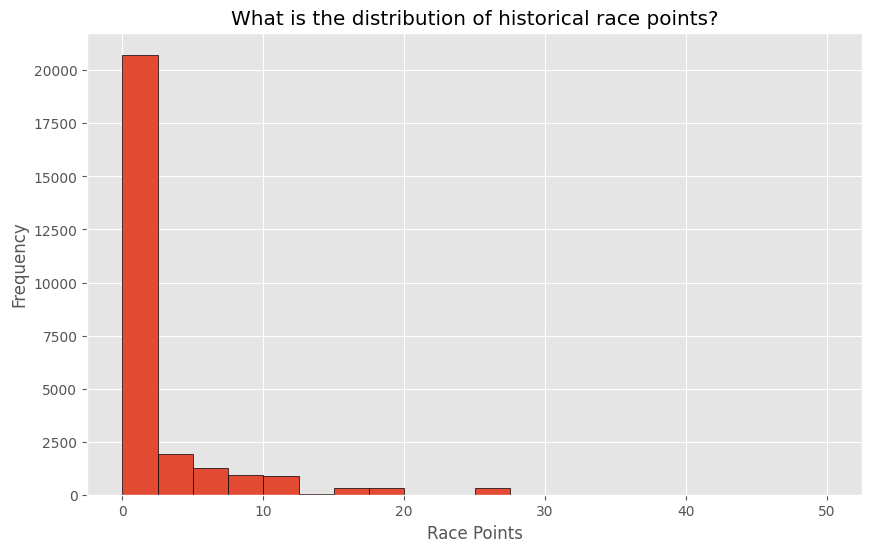

In [60]:
# EDA for Results dataset: key business insight - what is the distribution of historical race points?

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_results['points'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Race Points')
plt.ylabel('Frequency')
plt.title('What is the distribution of historical race points?')
plt.grid(True)
plt.show()

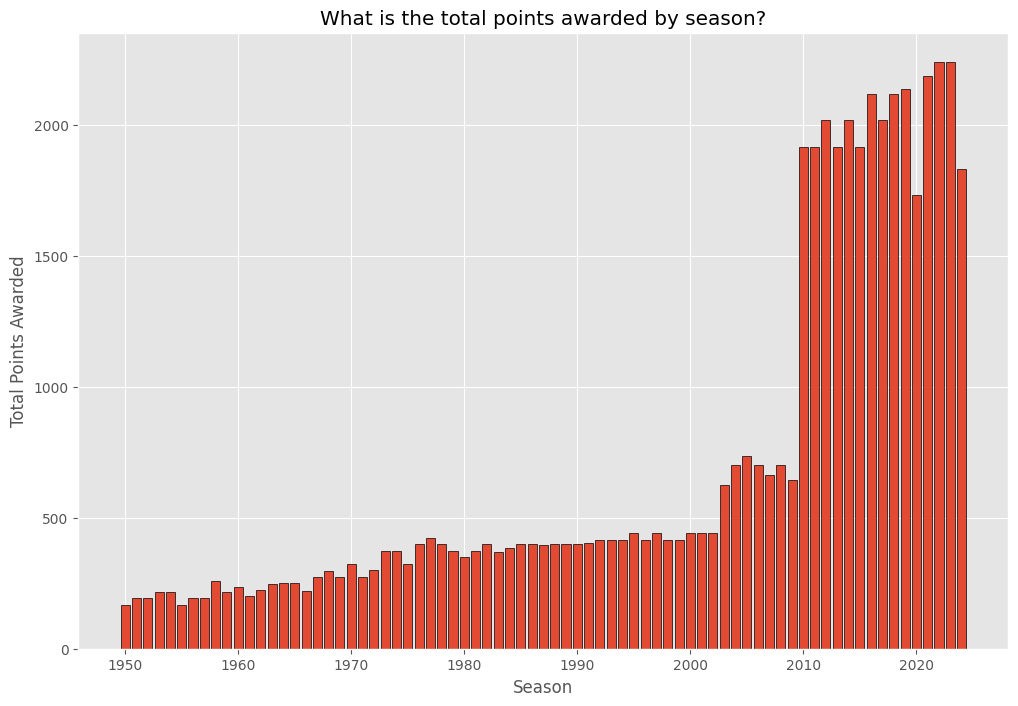

In [61]:
# EDA for Results datase: key business insight - what is the total points awarded by season?

# Merge results with races to retrieve race 'year''
df_results = pd.merge(df_results, df_races, on='raceId', how='left', suffixes=('_res', '_race'))

# Use race 'year' to calc the total race points awarded for each season
df_total_points_by_season = df_results.groupby('year')['points'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_total_points_by_season['year'], df_total_points_by_season['points'], edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Total Points Awarded')
plt.title('What is the total points awarded by season?')
plt.grid(True)
plt.show()

In [62]:
# EDA for Results datase: key business insight - what is the total points awarded by season? - data quality check for merged dataframe?
print(df_total_points_by_season.isna().sum())
print(df_total_points_by_season.nunique)

year      0
points    0
dtype: int64
<bound method DataFrame.nunique of     year   points
0   1950   168.00
1   1951   192.00
2   1952   192.00
3   1953   216.00
4   1954   215.56
..   ...      ...
70  2020  1734.00
71  2021  2189.50
72  2022  2242.00
73  2023  2242.00
74  2024  1833.00

[75 rows x 2 columns]>


##### *Data quality notes: No missing values for merged dataframe: df_total_points_by_season for above analysis.

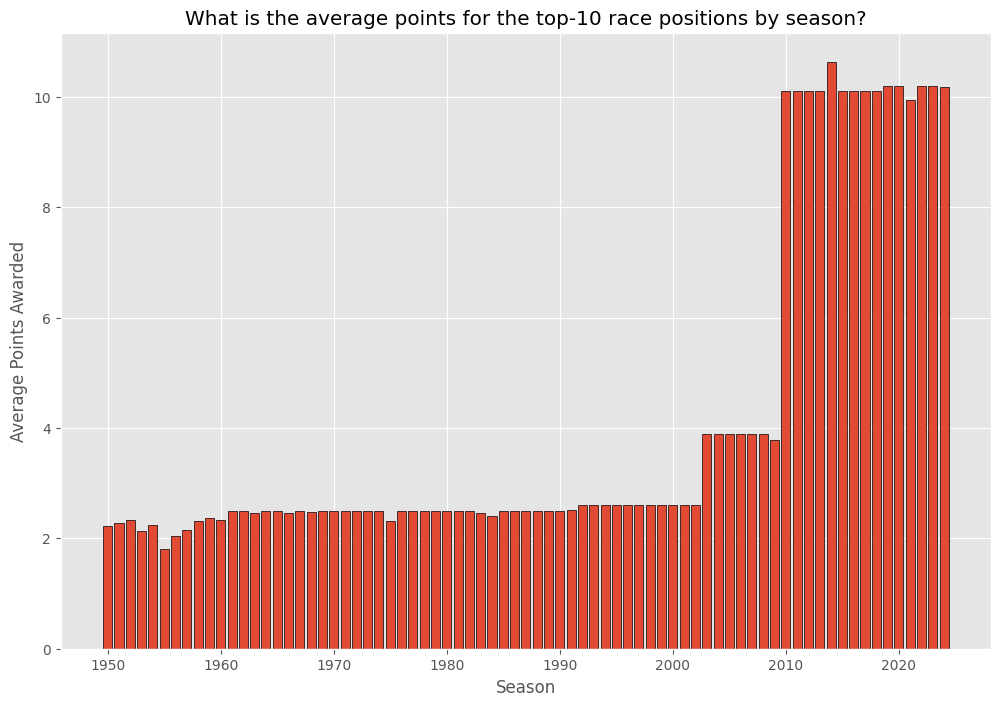

In [63]:
# EDA for Results dataset: key business insight - what is the average points for the top-10 race positions by season?

# Filter data for the top 10 race result 'positionOrder'
df_top10 = df_results[df_results['positionOrder'] <= 10]

# Calc average points for the top-10 race result positions by 'year''
df_avg_top10_by_season = df_top10.groupby('year')['points'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(df_avg_top10_by_season['year'], df_avg_top10_by_season['points'], edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Average Points Awarded')
plt.title('What is the average points for the top-10 race positions by season?')
plt.grid(True)
plt.show()

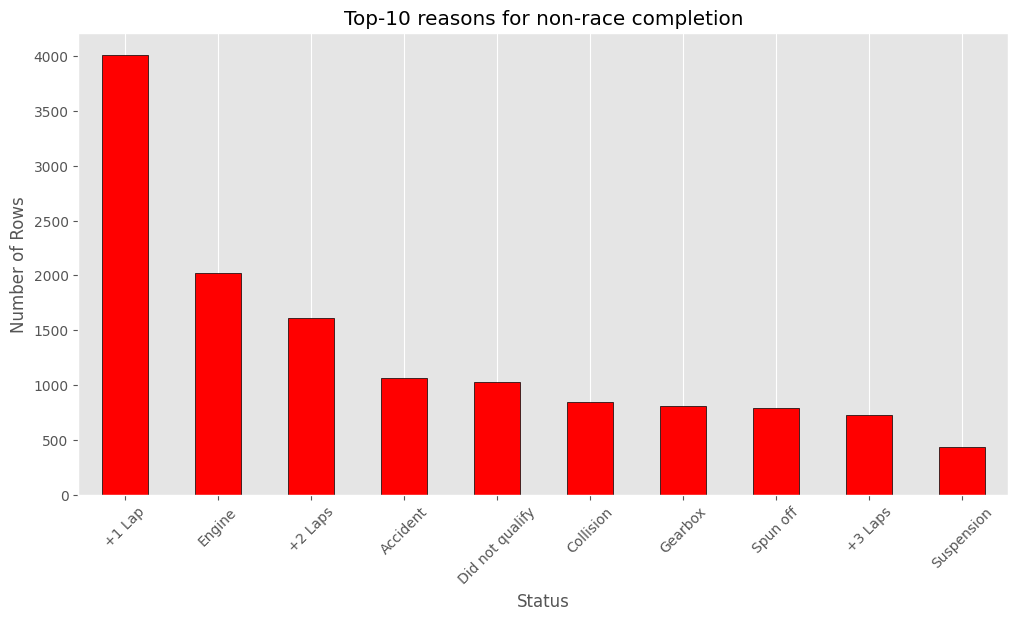

In [64]:
# EDA for Results dataset: key business insight - top-10 reasons for non-race completion

# Merge resuts with statuslap times with results and status to retrieve non-race completion 'status'
df_result_status = pd.merge(df_results, df_status, on='statusId', how='right')

# Exclude races that were completed ie. status = 'Finished'
df_non_finished = df_result_status[df_result_status['status'] != 'Finished']

# Count the number of races by status
df_status_counts = df_non_finished['status'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
df_status_counts.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Status')
plt.ylabel('Number of Rows')
plt.title('Top-10 reasons for non-race completion')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [65]:
# EDA for Results dataset: key business insight - top-10 reasons for non-race completion - data quality check for merged dataframe?
print(df_status_counts.isna().sum())
print(df_status_counts.nunique)

0
<bound method IndexOpsMixin.nunique of status
+1 Lap             4012
Engine             2023
+2 Laps            1613
Accident           1060
Did not qualify    1025
Collision           849
Gearbox             810
Spun off            792
+3 Laps             731
Suspension          431
Name: count, dtype: int64>


##### *Data quality notes: No missing values for merged dataframe: df_status_counts for above analysis.

### EDA_UA08 - Univariate Analysis for Grid Position Table
- The columns have the correct datatype.
- There are no missing values in the columns to be kept.

In [66]:
# EDA for Grid Position in Results dataset - structure of the data - summary statistics
print(df_results.shape), print(df_results['grid'].describe())

(26639, 35)
count    26639.000000
mean        11.139945
std          7.208234
min          0.000000
25%          5.000000
50%         11.000000
75%         17.000000
max         34.000000
Name: grid, dtype: float64


(None, None)

In [67]:
# EDA for Grid Position in Results dataset: quality of data - check datatypes
df_results['grid'].dtypes

dtype('int64')

In [68]:
# EDA for Grid Position in Results dataset: quality of data - check missing values
print(df_circuits.isna().sum())
print(df_circuits.nunique)

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64
<bound method DataFrame.nunique of     circuitId   circuitRef                                  name  \
0           1  albert_park        Albert Park Grand Prix Circuit   
1           2       sepang          Sepang International Circuit   
2           3      bahrain         Bahrain International Circuit   
3           4    catalunya        Circuit de Barcelona-Catalunya   
4           5     istanbul                         Istanbul Park   
..        ...          ...                                   ...   
72         75     portimao    Autódromo Internacional do Algarve   
73         76      mugello  Autodromo Internazionale del Mugello   
74         77       jeddah               Jeddah Corniche Circuit   
75         78       losail          Losail International Circuit   
76         79        miami         Miami International Autod

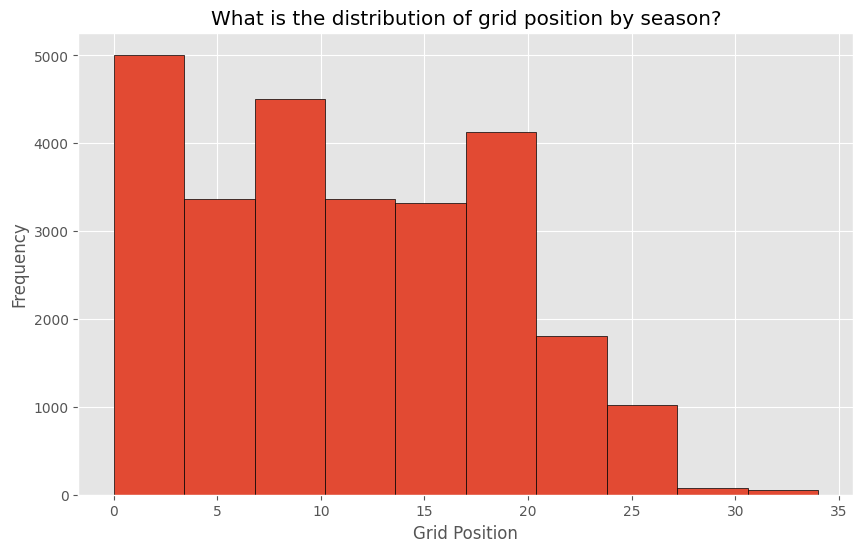

In [69]:
# EDA for Grid Position in Results dataset: key business insight - what is the distribution of grid position by season?

# Merge race results with races to retrieve race season
df_race_res = pd.merge(df_results, df_races, on='raceId', how='left', suffixes=('_res', '_race'))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_race_res['grid'], bins=10, edgecolor='black')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')
plt.title('What is the distribution of grid position by season?')
plt.grid(True)
plt.show()

In [70]:
# EDA for Grid Position in Results dataset: key business insight - what is the distribution of average grid position by season? - data quality check for merged dataframe?
print(df_race_res.isna().sum())
print(df_race_res.nunique)

resultId                0
raceId                  0
driverId                0
constructorId           0
number                  0
grid                    0
position            10934
positionText            0
positionOrder           0
points                  0
laps                    0
time_res                0
milliseconds            0
fastestLap              0
rank                    0
fastestLapTime          0
fastestLapSpeed         0
statusId                0
year_res                0
round_res               0
circuitId_res           0
name_res                0
date_res                0
time_race           18469
url_res                 0
fp1_date_res        26639
fp1_time_res        25400
fp2_date_res        26639
fp2_time_res        25400
fp3_date_res        26639
fp3_time_res        25640
quali_date_res      26639
quali_time_res      25400
sprint_date_res     26639
sprint_time_res     26399
year_race               0
round_race              0
circuitId_race          0
name_race   

##### *Data quality notes: No critical missing values for merged dataframe: df_race_res for above analysis (Missing values only exist for redundant column: number).

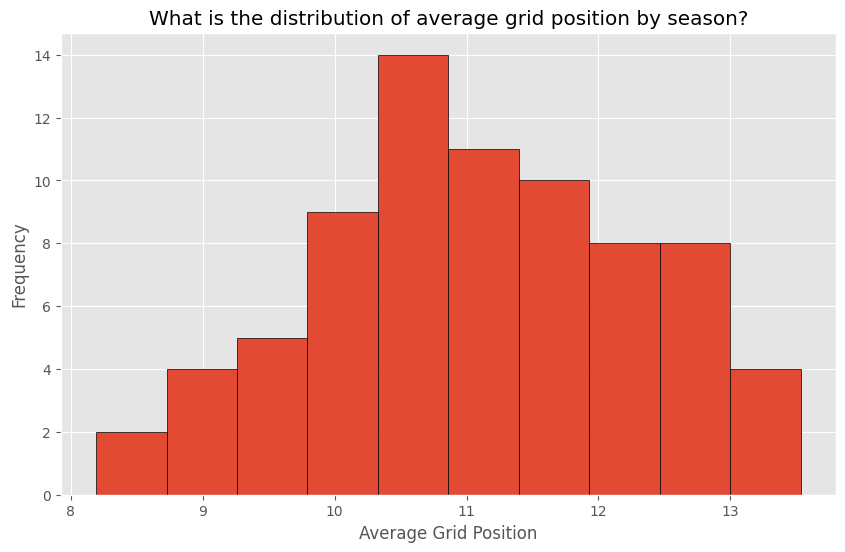

In [71]:
# EDA for Grid Position in Results dataset: key business insight - what is the distribution of average grid position by season?

# Use race season to calc average 'grid' position by season
df_avg_season_grid_pos = df_results.groupby('year')['grid'].mean()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_avg_season_grid_pos, bins=10, edgecolor='black')
plt.xlabel('Average Grid Position')
plt.ylabel('Frequency')
plt.title('What is the distribution of average grid position by season?')
plt.grid(True)
plt.show()

### EDA_UA09 - Univariate Analysis for Lap Times Table (race lap times & qualifying round lap times):
- The columns have the correct datatype.
- TODO: There are missing values for qualifiying times and the datatypes needed to be corrected.
- The difference in distribtions for qualifying round 1 vs 3 & 3 could be due to race strategy as in Q1, the 5 drivers with the slowest lap times are eliminated from Q2 & Q3. The aim of Q2 and Q3 is to reach the fastest time to secure a grid start position for the race itself, which may result in drivers being split into clusters of drivers that are the fastest vs the others.

In [72]:
# EDA for Lap Times from Qualifying dataset: structure of data - summary statistics
stats = df_lap_times.describe()
print(df_lap_times.shape), print(df_lap_times), print(stats)

(582767, 6)
        raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
582762    1138       855   57        15  1:37.875         97875
582763    1138       855   58        15  1:37.758         97758
582764    1138       855   59        15  1:37.759         97759
582765    1138       855   60        15  1:39.830         99830
582766    1138       855   61        15  1:38.975         98975

[582767 rows x 6 columns]
              raceId       driverId            lap       position  \
count  582767.000000  582767.000000  582767.000000  582767.000000   
mean      594.684452     321.095572      30.017758     

(None, None, None)

In [73]:
# EDA for Lap Times from Qualifying dataset: quality of data - check datatypes
df_lap_times.dtypes

raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: object

In [74]:
# EDA for Lap Times from Qualifying dataset: quality of data - check missing values
print(df_lap_times.isna().sum())
print(df_lap_times.nunique)

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64
<bound method DataFrame.nunique of         raceId  driverId  lap  position      time  milliseconds
0          841        20    1         1  1:38.109         98109
1          841        20    2         1  1:33.006         93006
2          841        20    3         1  1:32.713         92713
3          841        20    4         1  1:32.803         92803
4          841        20    5         1  1:32.342         92342
...        ...       ...  ...       ...       ...           ...
582762    1138       855   57        15  1:37.875         97875
582763    1138       855   58        15  1:37.758         97758
582764    1138       855   59        15  1:37.759         97759
582765    1138       855   60        15  1:39.830         99830
582766    1138       855   61        15  1:38.975         98975

[582767 rows x 6 columns]>


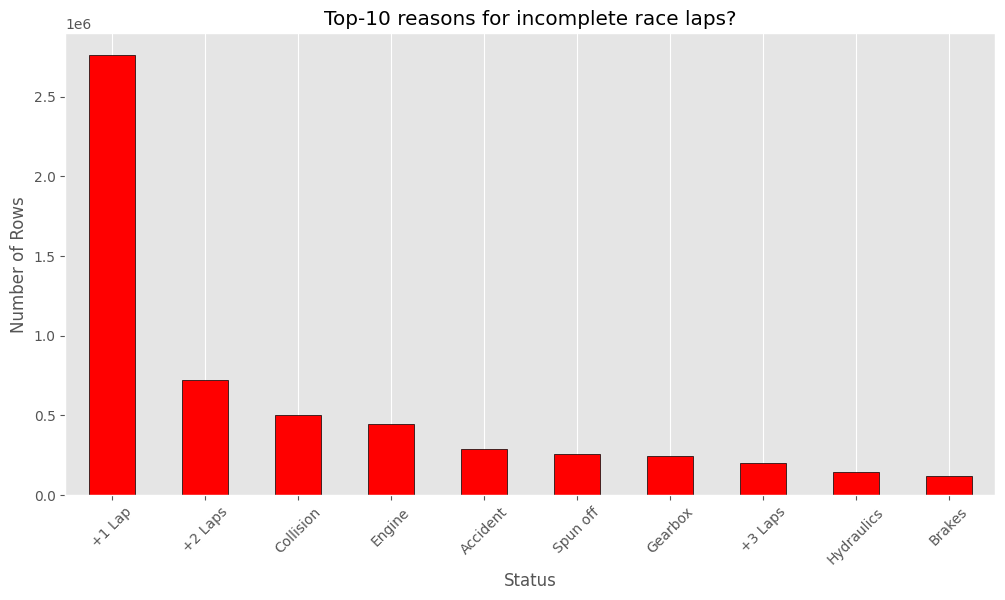

In [75]:
# EDA for Lap Times from Qualifying dataset: key business insight - top-10 reasons for incomplete race laps?

# Merge lap times with results and status to retrieve 'status'
df_lap_status1 = pd.merge(df_lap_times, df_results, on='raceId', how='right')
df_lap_status2 = pd.merge(df_lap_status1, df_status, on='statusId', how='right')

# Filter laps where to exclude completed laps i.e. 'status' = 'Finished'
df_laps_not_finished = df_lap_status2[df_lap_status2['status'] != 'Finished']

# Count the number of rows for each status
df_laps_not_finished_status_counts = df_laps_not_finished['status'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
df_laps_not_finished_status_counts.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Status')
plt.ylabel('Number of Rows')
plt.title('Top-10 reasons for incomplete race laps?')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [76]:
# EDA for Lap Times from Qualifying dataset: key business insight - top-10 reasons for incomplete race laps? - data quality check for merged dataframe?
print(df_laps_not_finished_status_counts.isna().sum())
print(df_laps_not_finished_status_counts.nunique)

0
<bound method IndexOpsMixin.nunique of status
+1 Lap        2759831
+2 Laps        722246
Collision      503819
Engine         449028
Accident       289249
Spun off       259841
Gearbox        242762
+3 Laps        200045
Hydraulics     144064
Brakes         121590
Name: count, dtype: int64>


##### *Data quality notes: No missing values for merged dataframe: df_laps_not_finished_status_counts for above analysis.

582767
5459432


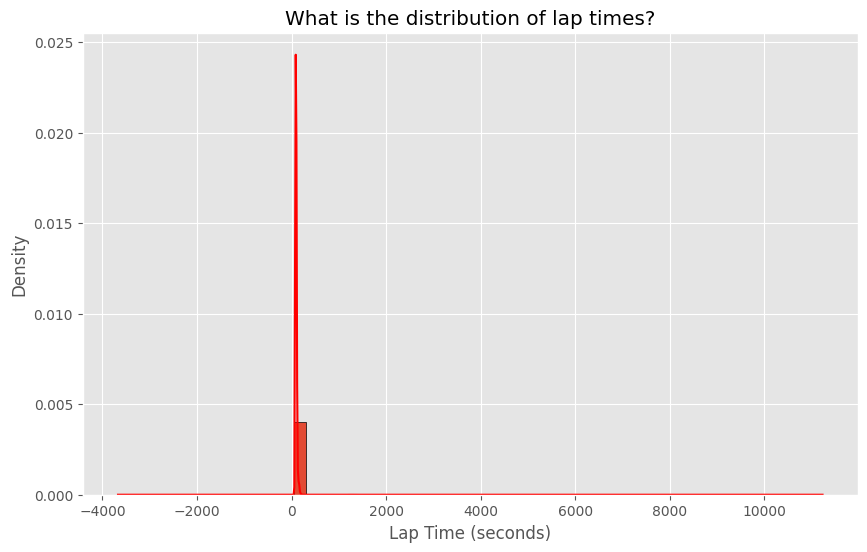

In [77]:
# EDA for Lap Times from Qualifying dataset: key business insight - what is the distribution of lap times?

# Convert lap times from milliseconds to seconds, to make it easier for human comprehension
df_lap_times['seconds'] = df_lap_times['milliseconds'] / 1000

# Merge lap times with results and status to retrieve 'status'
df_lap_status = pd.merge(df_lap_times, df_results, on='raceId', how='right')
df_lap_status = pd.merge(df_lap_status, df_status, on='statusId', how='right')

# Filter out laps for races that were 'status' == 'finished'
print(df_lap_times.shape[0])
df_finished_lap_times = df_lap_status[df_lap_status['status'] == 'Finished']
print(df_finished_lap_times.shape[0])

# Plot histogram 
plt.figure(figsize=(10, 6))
plt.hist(df_finished_lap_times['seconds'].dropna(), bins=30, edgecolor='black', density=True)
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')
plt.title('What is the distribution of lap times?')
plt.grid(True)

# Add a density plot
df_finished_lap_times['seconds'].plot(kind='kde', color='red')

# Set Scales dimensions
# plt.xlim([0, 200])
# plt.set_xlim([0, 200])

plt.show()

In [78]:
# EDA for Qualifying Lap Times from Qualifying dataset: structure of data - summary statistics

# EDA for Qualifying Lap Times dataset - summary stats
stats = df_qualifying.describe()
print(df_qualifying), print(stats)

       qualifyId  raceId  driverId  constructorId  number  position        q1  \
0              1      18         1              1      22         1  1:26.572   
1              2      18         9              2       4         2  1:26.103   
2              3      18         5              1      23         3  1:25.664   
3              4      18        13              6       2         4  1:25.994   
4              5      18         2              2       3         5  1:25.960   
...          ...     ...       ...            ...     ...       ...       ...   
10369      10427    1138       817            215       3        16  1:31.085   
10370      10428    1138       840            117      18        17  1:31.094   
10371      10429    1138       842            214      10        18  1:31.312   
10372      10430    1138       822             15      77        19  1:31.572   
10373      10431    1138       855             15      24        20  1:32.054   

             q2        q3  

(None, None)

In [79]:
# EDA for Qualifying Lap Times from Qualifying dataset: quality of data - check datatypes
df_qualifying.dtypes

qualifyId         int64
raceId            int64
driverId          int64
constructorId     int64
number            int64
position          int64
q1               object
q2               object
q3               object
dtype: object

In [80]:
# EDA for Qualifying Lap Times from Qualifying dataset: quality of data - check missing values

# check for missing values
print(df_qualifying['q1'].isna().sum())
print(df_qualifying['q2'].isna().sum())
print(df_qualifying['q2'].isna().sum())

# fix missing values
df_qualifying['q1_secs'] = df_qualifying['q1'].replace("\\N", "0:00.000")
df_qualifying['q2_secs'] = df_qualifying['q2'].replace("\\N", "0:00.000")
df_qualifying['q3_secs'] = df_qualifying['q3'].replace("\\N", "0:00.000")

0
22
22


In [81]:
# EDA for Qualifying Lap Times from Qualifying dataset: quality of data - fix time format columns

# function to convert "min:ss.ms" to seconds
def strtime_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '0:000.000':
        return 0
    hours, sec_ms = time_str.split(':')
    sec, ms = sec_ms.split('.')
    return int(hours) * 3600 + int(sec) + int(ms) / 1000

# Convert time in string format to seconds
df_qualifying['q1_secs_int'] = df_qualifying['q1_secs'].apply(strtime_to_seconds).astype(np.int64)
df_qualifying['q2_secs_int'] = df_qualifying['q2_secs'].apply(strtime_to_seconds).astype(np.int64)
df_qualifying['q3_secs_int'] = df_qualifying['q3_secs'].apply(strtime_to_seconds).astype(np.int64)
df_qualifying

qualifyId  raceId  driverId  constructorId  number  position        q1  \
0              1      18         1              1      22         1  1:26.572   
1              2      18         9              2       4         2  1:26.103   
2              3      18         5              1      23         3  1:25.664   
3              4      18        13              6       2         4  1:25.994   
4              5      18         2              2       3         5  1:25.960   
...          ...     ...       ...            ...     ...       ...       ...   
10369      10427    1138       817            215       3        16  1:31.085   
10370      10428    1138       840            117      18        17  1:31.094   
10371      10429    1138       842            214      10        18  1:31.312   
10372      10430    1138       822             15      77        19  1:31.572   
10373      10431    1138       855             15      24        20  1:32.054   

             q2        q3   q1_secs   q2_secs   q3_secs  q1_secs_int  \
0      1:25.187  1:26.714  1:26.572  1:25.187  1:26.714         3626   
1      1:25.315  1:26.869  1:26.103  1:25.315  1:26.869         3626   
2      1:25.452  1:27.079  1:25.664  1:25.452  1:27.079         3625   
3      1:25.691  1:27.178  1:25.994  1:25.691  1:27.178         3625   
4      1:25.518  1:27.236  1:25.960  1:25.518  1:27.236         3625   
...         ...       ...       ...       ...       ...          ...   
10369        \N        \N  1:31.085  0:00.000  0:00.000         3631   
10370        \N        \N  1:31.094  0:00.000  0:00.000         3631   
10371        \N        \N  1:31.312  0:00.000  0:00.000         3631   
10372        \N        \N  1:31.572  0:00.000  0:00.000         3631   
10373        \N        \N  1:32.054  0:00.000  0:00.000         3632   

       q2_secs_int  q3_secs_int  
0             3625         3626  
1             3625         3626  
2             3625         3627  
3             3625         3627  
4             3625         3627  
...            ...          ...  
10369            0            0  
10370            0            0  
10371            0            0  
10372            0            0  
10373            0            0  

[10374 rows x 15 columns]

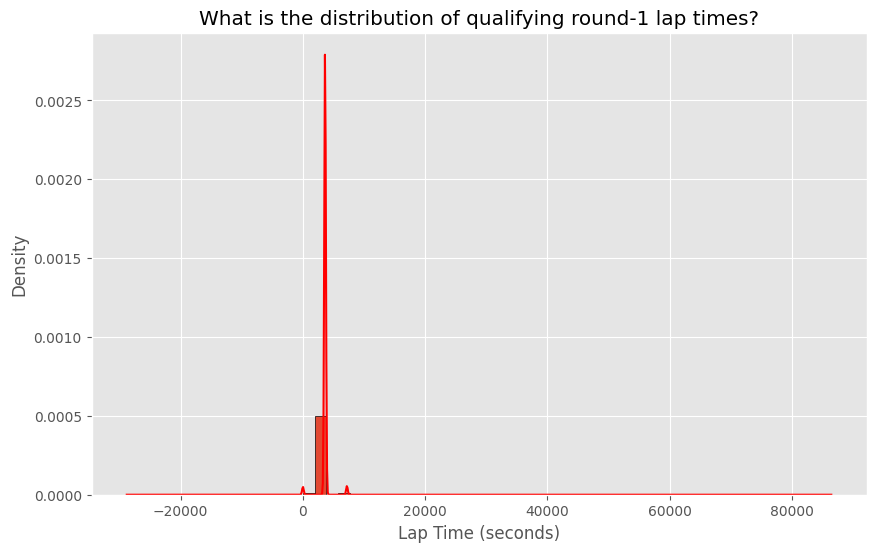

In [82]:
# EDA for Qualifying Lap Times from Qualifying dataset: key business insight - what is the distribution of qualifying round-1 lap times?

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_qualifying['q1_secs_int'].dropna(), bins=30, edgecolor='black', density=True)
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')
plt.title('What is the distribution of qualifying round-1 lap times?')
plt.grid(True)

# Set scale for x-axis
# plt.xlim(50, 100)  

# Add density plot to show curve
df_qualifying['q1_secs_int'].plot(kind='kde', color='red')

plt.show()

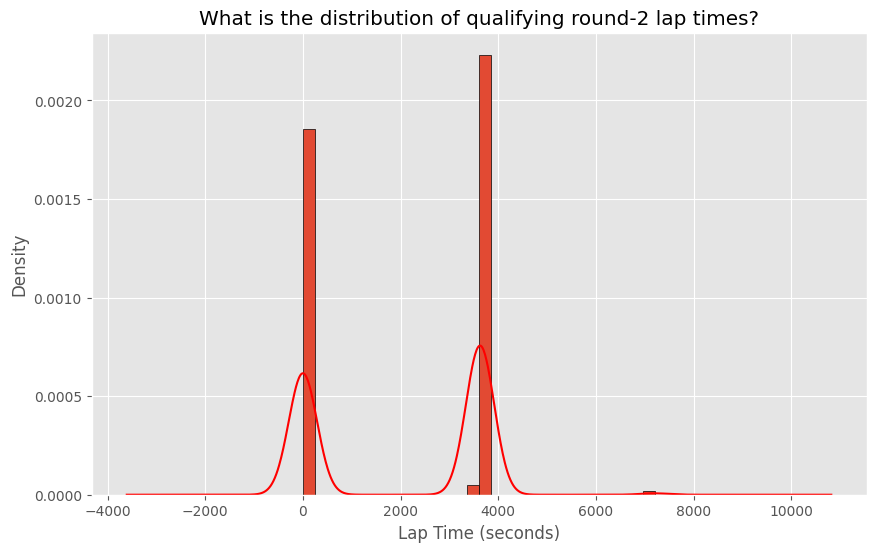

In [83]:
# EDA for Qualifying Lap Times from Qualifying dataset: key business insight - what is the distribution of qualifying round-2 lap times?

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_qualifying['q2_secs_int'].dropna(), bins=30, edgecolor='black', density=True)
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')
plt.title('What is the distribution of qualifying round-2 lap times?')
plt.grid(True)

# Add a density plot to show curve
df_qualifying['q2_secs_int'].plot(kind='kde', color='red')

plt.show()

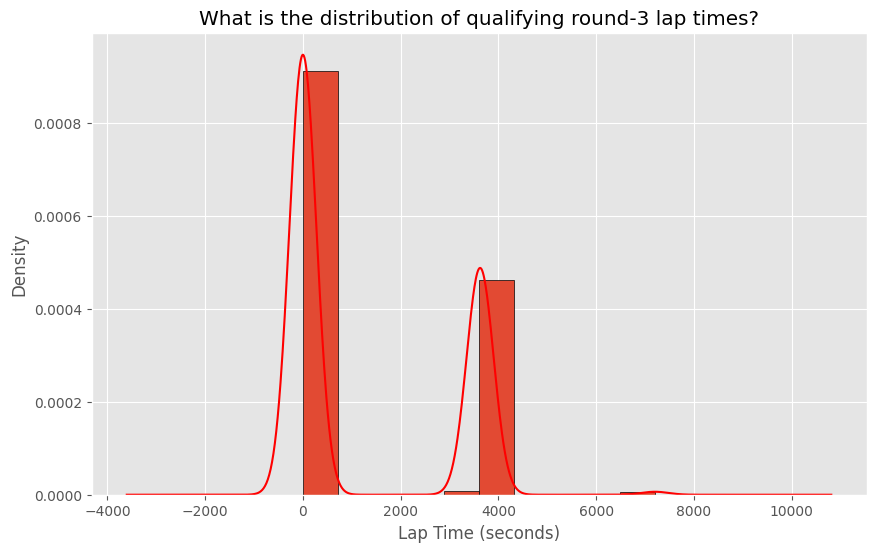

In [84]:
# EDA for Qualifying dataset: key business insight - what is the distribution of qualifying round-3 lap times?

# Plot histogram with more bins for a smoother curve
plt.figure(figsize=(10, 6))
plt.hist(df_qualifying['q3_secs_int'].dropna(), bins=10, edgecolor='black', density=True)
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')
plt.title('What is the distribution of qualifying round-3 lap times?')
plt.grid(True)

# Add a density plot to show curve
df_qualifying['q3_secs_int'].plot(kind='kde', color='red')

plt.show()

## Conclusions from Univariate Analysis

From a data lineage perspective, the Ergast API has been considered a reliable data source for F1 analysis. Historical data goes all the way back to 1950 when F1 was launched as an official motorsport.

From the EDA above concucted above, it is clear that there is a lack of consistency' in the data with some datasets such as circuits, races schedule, pit stops, and even lap times. This has partly been due to the development of technology and modern engineering but also as a result of cotinued changes to the sport as a whole (rules & egulations, points, etc) itself to make it more competitive and entertaining to spectators. *"Evolution is the lifeblood of Formula 1 - faster cars, safer cars, new circuits and fresh-faced world champions"* (source: http://www.bbc.co.uk/sport/formula1/21880627 & http://www.formulaonehistory.com). These constant changes are likely to adversely impact the reliability of a predictive model. In addition, there could be hidden bias which is not immediately apparent from the EDA conducted so far e.g. taking into account drivers that have raced fewer races but scored higher race points vs. drivers that scored fewer race points but have raced in more races. 

There is a lack of data relating to lap times for qualifying rounds as well as a lack of publicly available data pertaining to car configuration and race strategy, which would almost certainly not be shared outside of individual constructor teams.

Given the above, the remaining analysis for this project will focus on driver performance.

## Feature Engineering
Additional feature engineering will be used to add predictor variables for consistency of driver performance: avg_num_wins, avg_num_pole_pos.

In [85]:
# Feature Engineering: already as part of EDA (from above)
 
# Add experience back to driver dataset. 
# df_drv = pd.merge(df_drv, df_exp_grp[['exp_years']], on='driverId', how='left')

# Add age at first race, age at last race, age in each race back to original dataset. 
# df_drv = pd.merge(df_drv, df_age_grp, on='driverId', how='left')

In [86]:
# Feature Engineering: current_age

# Calc current age for each driver
df_drv['current_age'] = (pd.to_datetime('today') - df_drv['dob_x']).dt.days // 365
df_drv['current_age'] = df_drv['current_age'].astype(int)

In [87]:
# Feature Engineering: avg_career_wins

# Calc total wins for each driver
df_results['wins'] = df_results['position'] == 1
df_total_wins = df_results.groupby('driverId')['wins'].sum().reset_index()

# Calc total races for each driver
df_total_races = df_results.groupby('driverId')['raceId'].count().reset_index()
df_total_races.columns = ['driverId', 'total_races']

# Merge total wins and total races
df_drv_wins = pd.merge(df_total_wins, df_total_races, on='driverId')

# Calc average number of career wins
df_drv_wins['avg_career_wins'] = df_drv_wins['wins'] / df_drv_wins['total_races']

# Add avg_career_wins back to df_drv dataframe
df_drv = pd.merge(df_drv, df_drv_wins[['driverId', 'avg_career_wins']], on='driverId', how='left')

In [88]:
# Feature Engineering: avg_career_pole_pos

# Calc total pole positions for each driver
df_results['pole_pos'] = df_results['grid'] == 1
df_total_pole_pos = df_results.groupby('driverId')['pole_pos'].sum().reset_index()

# Merge total pole positions and total races
df_drv_pole_pos = pd.merge(df_total_pole_pos, df_total_races, on='driverId')

# Calc average number of pole positions
df_drv_pole_pos['avg_career_pole_pos'] = df_drv_pole_pos['pole_pos'] / df_drv_pole_pos['total_races']

# Add avg_career_pole_pos back to df_drv dataframe
df_drv = pd.merge(df_drv, df_drv_pole_pos[['driverId', 'avg_career_pole_pos']], on='driverId', how='left')

In [89]:
# Feature Engineering: avg_career_top3_grid_pos

# Calc total top-3 grid positions for each driver
df_results['top3_grid_pos'] = df_results['grid'].isin([1, 2, 3])
df_total_top3_grid_pos = df_results.groupby('driverId')['top3_grid_pos'].sum().reset_index()

# Merge total top-3 grid positions and total races
df_drv_grid_pos = pd.merge(df_total_top3_grid_pos, df_total_races, on='driverId')

# Calc average number of top-3 grid positions
df_drv_grid_pos['avg_career_top3_grid_pos'] = df_drv_grid_pos['top3_grid_pos'] / df_drv_grid_pos['total_races']

# Add avg_career_top3_grid_pos back to df_drv dataframe
df_drv = pd.merge(df_drv, df_drv_grid_pos[['driverId', 'avg_career_top3_grid_pos']], on='driverId', how='left')

In [90]:
# Feature Engineering: Add drv_won_last_race column

# Merge results with races to retrieve race season
df_res = pd.merge(df_results, df_races, on='raceId', how='left')

# Sort all race results by driver + year + race id
df_res = df_res.sort_values(['driverId', 'year_x', 'raceId'])

# Use window funtion to calc whether driver won last race by seeing if previous race result position was first
df_drv['won_last_race'] = df_res.groupby('driverId')['position'].shift(1) == 1
df_drv['won_last_race'] = df_drv['won_last_race'].fillna(False).astype(int)

In [91]:
# Feature Engineering: Add drv_pole_pos_last_race column

# Merge results with races to retrieve race season
df_res = pd.merge(df_results, df_races, on='raceId', how='left')

# Sort all race results by driver + year + race id
df_res = df_res.sort_values(['driverId', 'year_x', 'raceId'])

# Use window function to calc whether driver has pole position for last race by seeing if previous race grid position was first
df_drv['pole_pos_last_race'] = df_res.groupby('driverId')['grid'].shift(1) == 1
df_drv['pole_pos_last_race'] = df_drv['pole_pos_last_race'].fillna(False).astype(int)

## EDA Approach for Multivariate Analysis & Feature Selection
- Visually inspect correlation charts for patterns.
- Check correlation coefficient to show strength and direction of relationships between features.
- Apply feature selection to reduce chances of over-fitting and under-fitting the model. 


### EDA_MA01 - Multivariate Analysis 1: Driver Performance Variables
- The data quality check shows that observations have missing values for the feature engineered variables, exp_years & age_first_race_x, out of 26,639 rows. Decision: remove these rows given that this is less than 1% of total observations.
- All variables are numerical, so can plot a pairplot to show correlation visually.
- For (race) position order the following predictor variables are ordered according to their correlation strength (ie. ignoring direction of correlation): [1] avg_career_wins, [2] avg_career_pole_pos, [3] exp_years, [4] age_at_first_race, [5] current_age.
- For (race) points the following predictor variables are ordered according to their correlation strength (ie. ignoring direction of correlation): [1] avg_career_wins, [2] avg_career_pole_pos, [3] exp_years, [4] current_age, [5] age_at_first_race.
- Scatterplots are not easy to interpret due to number of data points. Decision: re-plot using KDE plot as part of Feature Selection Approach (below).
- From the univariate analysis, not all variables are normally distributed. This should be taken into account for model selection and feature selection, as well as evaluation of model results.

In [92]:
### EDA - Create single dataframe for multi-variate analysis: 
# a) target vars: 'positionOrder', 'points'
# b) predictor vars: 'current_age', 'exp_years', 'age_first_race_x, 'avg_career_wins', 'avg_career_pole_pos', 'avg_career_top3_grid_pos'

# Get relevant driver performance person features
df_dp_drv = df_drv[['driverId', 'driverRef', 'current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins', 'avg_career_pole_pos', 'avg_career_top3_grid_pos', 'won_last_race', 'pole_pos_last_race']]

# Merge back with race results dataset
df_dp_res = df_results[['driverId', 'positionOrder', 'points']]
df_dp_vars1 = pd.merge(df_dp_drv, df_dp_res, on='driverId', how='right')

# Keep relevant features for analysis
df_dp_vars1 = df_dp_vars1[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins', 'avg_career_pole_pos', 'avg_career_top3_grid_pos', 'won_last_race', 'pole_pos_last_race', 'positionOrder', 'points']]

In [93]:
# EDA for single dataframe: struture of data - summary statistics
print(df_dp_vars1.isna().sum())

current_age                  0
exp_years                   24
age_first_race_x            24
avg_career_wins              0
avg_career_pole_pos          0
avg_career_top3_grid_pos     0
won_last_race                0
pole_pos_last_race           0
positionOrder                0
points                       0
dtype: int64


In [94]:
# EDA for single dataframe: quality of data - missing values for 'exp_years'
print(df_dp_vars1[df_dp_vars1['exp_years'].isna()])

      current_age  exp_years  age_first_race_x  avg_career_wins  \
582            44        NaN               NaN              0.0   
3340           49        NaN               NaN              0.0   
4026           58        NaN               NaN              0.0   
5919           59        NaN               NaN              0.0   
6021           60        NaN               NaN              0.0   
6023           65        NaN               NaN              0.0   
6039           60        NaN               NaN              0.0   
6053           65        NaN               NaN              0.0   
6080           60        NaN               NaN              0.0   
6083           65        NaN               NaN              0.0   
6104           60        NaN               NaN              0.0   
6115           63        NaN               NaN              0.0   
6143           60        NaN               NaN              0.0   
6147           63        NaN               NaN              0.

In [95]:
# EDA for single dataframe: quality of data - missing values for 'age_first_race_x'
print(df_dp_vars1[df_dp_vars1['age_first_race_x'].isna()])

      current_age  exp_years  age_first_race_x  avg_career_wins  \
582            44        NaN               NaN              0.0   
3340           49        NaN               NaN              0.0   
4026           58        NaN               NaN              0.0   
5919           59        NaN               NaN              0.0   
6021           60        NaN               NaN              0.0   
6023           65        NaN               NaN              0.0   
6039           60        NaN               NaN              0.0   
6053           65        NaN               NaN              0.0   
6080           60        NaN               NaN              0.0   
6083           65        NaN               NaN              0.0   
6104           60        NaN               NaN              0.0   
6115           63        NaN               NaN              0.0   
6143           60        NaN               NaN              0.0   
6147           63        NaN               NaN              0.

In [96]:
# EDA for single dataframe: quality of data - drop 24 missing values for 'age_first_race_x' & 'age_first_race_x'
df_dp_vars_nan1 = df_dp_vars1.dropna(subset=['exp_years', 'age_first_race_x'])

In [97]:
# EDA for single dataframe with missing values for 'exp_years', 'age_first_race_x' removed: structure of data - summary statistics
print(df_dp_vars_nan1.isna().sum())

current_age                 0
exp_years                   0
age_first_race_x            0
avg_career_wins             0
avg_career_pole_pos         0
avg_career_top3_grid_pos    0
won_last_race               0
pole_pos_last_race          0
positionOrder               0
points                      0
dtype: int64


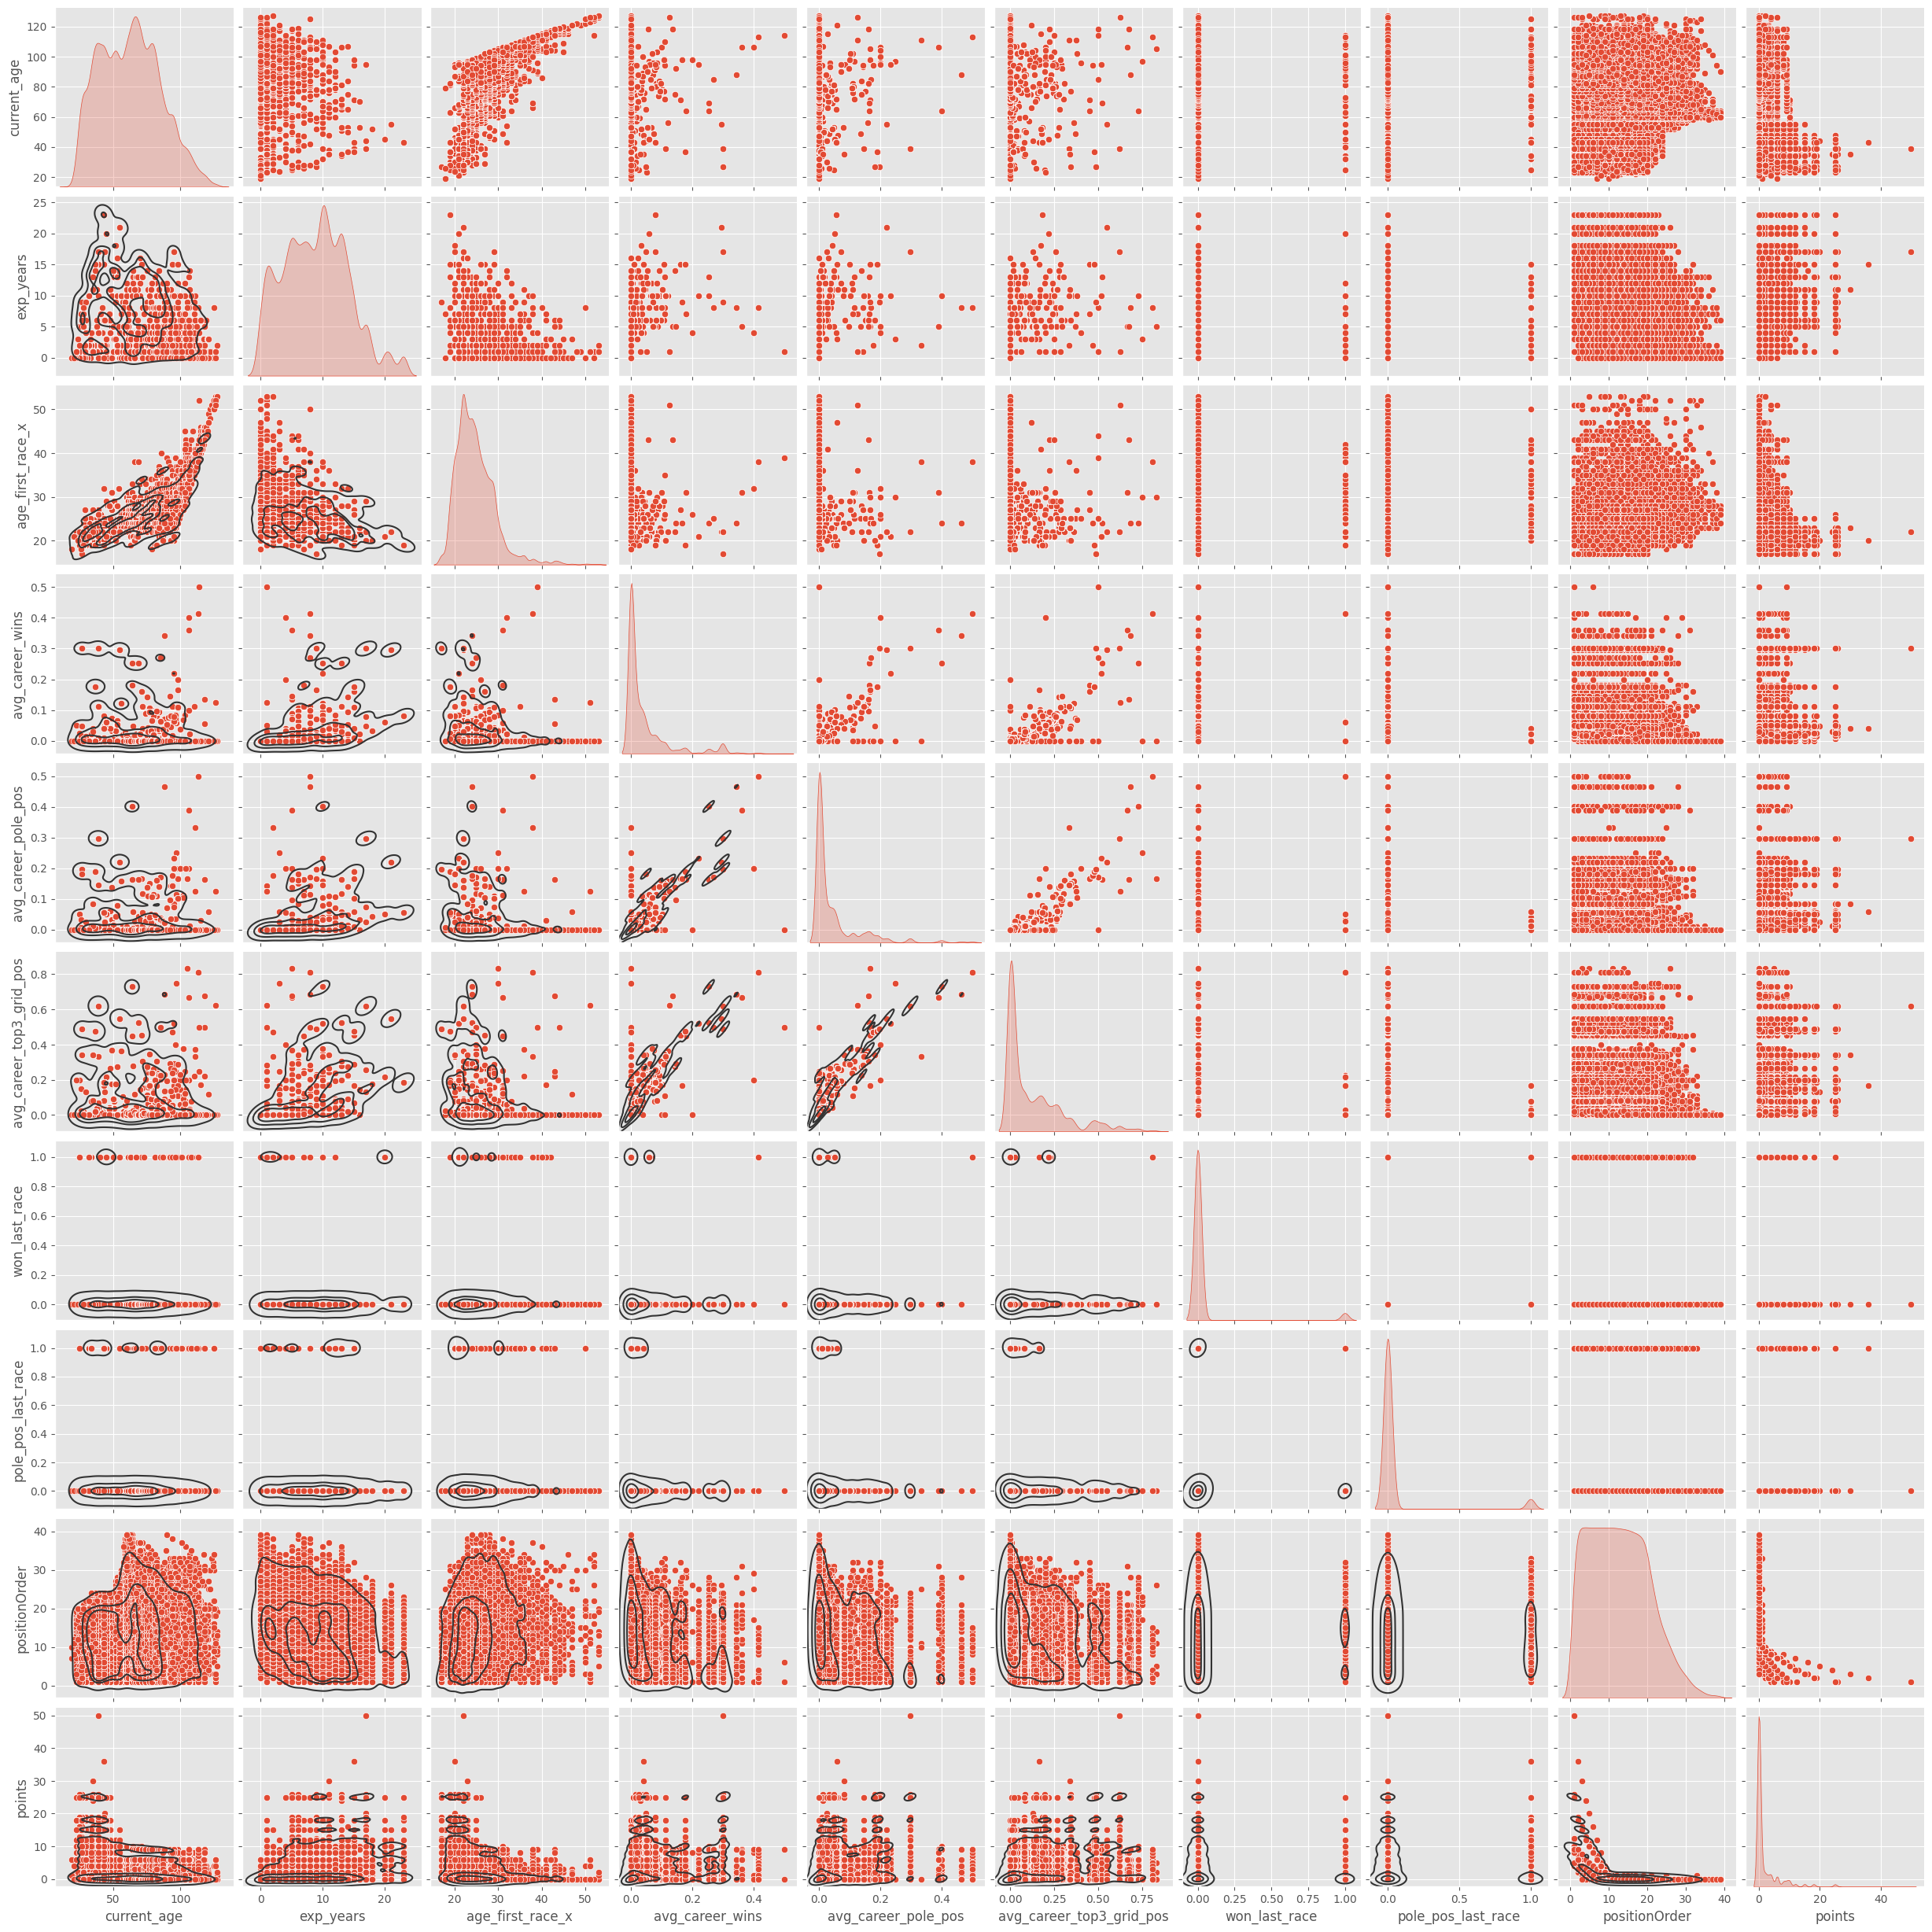

In [98]:
# Feature correlation - Plot pairplot 1
g = sns.pairplot(df_dp_vars_nan1, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

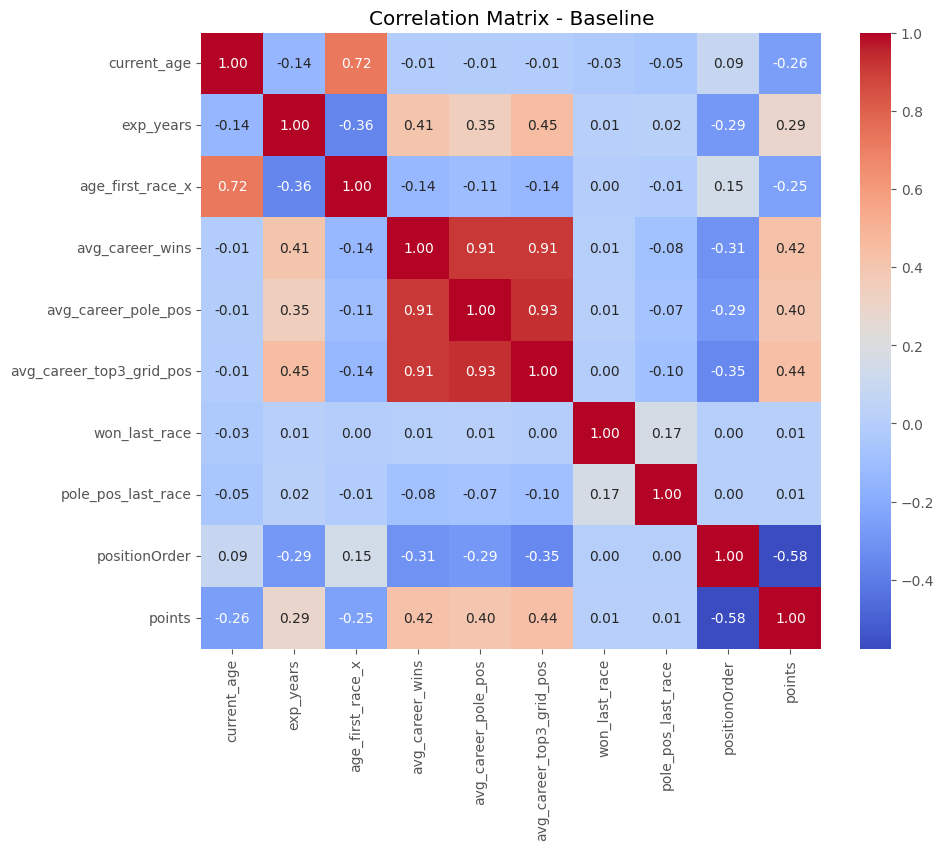

In [99]:
# Feature correlation - Plot correlation matrix 1

# Calc correlation matrix
corr_matrix = df_dp_vars_nan1.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Baseline')
plt.show()

### EDA_MV02 - Multivariate Analysis 2: Feature Selection 
- Feature selection will be applied to reduce chances of over-Fitting or under-Fitting of the Model by checking for multi-collinearity between features (aka variables).
- Correlation between predictor variables and the two target variables (positionOrder, points) is similar. Decision: remove points from the correlation as the points system has changed over the years and is rumoured to be changed again in 2026.
- There is high multi-collinearity between some of the predictor variables (avg_career_wins, avg_career_pole_pos, avg_career_top3_grid_pos). 
- Decision: remove the variables with the lowest correlation coefficient with positionOrder i.e. avg_career_pole_pos, avg_career_wins, won_last_race, pole_last_race

In [100]:
# Feature selection (as per above)
df_dp_vars_nan2 = df_dp_vars_nan1[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins', 'positionOrder']]

In [101]:
# Feature correlation: plot pairplot
g = sns.pairplot(df_dp_vars_nan2, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [102]:
# Feature correlation: plot pairgrid - to focus on showing densities (nb. histogrames not being shown with sufficient scale)
g = sns.PairGrid(df_dp_vars_nan2)
g.map_diag(sns.kdeplot, fill=True, bw_adjust=0.5)           # plot on the diagonal
g.map_offdiag(sns.kdeplot, cmap='Blues', bw_adjust=0.5)     # plot on the off-diagonal

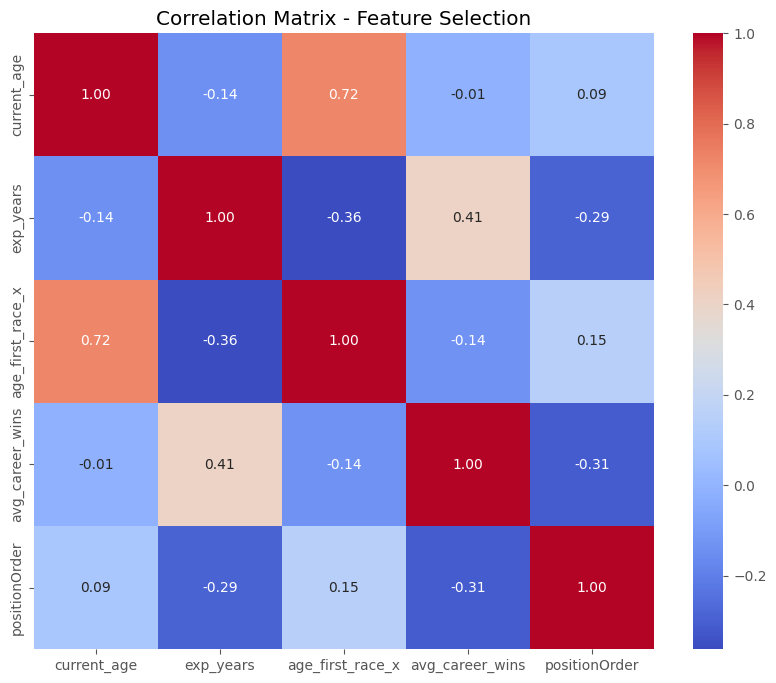

In [103]:
# Feaure correlation - plot correlation matrix 2

# Calc correlation matrix
corr_matrix = df_dp_vars_nan2.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Feature Selection')
plt.show()

## Conclusions from Multivariate Analysis & Feature Selection
- Decision: create baseline model focussing on driver performance features and feature selection to reduce complexity as an initial model. 
- Feature selection has also reduced multi-collinearity, which can adversely impact a model's statistical power.
- Some predictor variables are not normally distributed - may need to apply transformation to avg_career_wins or use XGBoost model as it can better cope with lack of normal distribution of features as well as multiple features.

**Updated Hypotheses (Following Completion of Univariate & Multivariate EDA Analysis):**
- HP_01: Younger drivers early on in their career achieve better race results than older drivers that are later on in their careers.
- HP_02: Drivers that first start racing in F1 achieve better race results than those that do not.
- HP_03: Drivers who consistently perform better in races during their career are more likely to achieve better race results.
- HP_04: Drivers who perform better in the previous race are likely to achieve better race results.

## Predictive Modelling
- Explaing modelling approach i.e. supervised learning (due to large sample size and mapping approach)
- Refrerence TSA model assumptions
- Explaing pros & cons

### PRED_MDL01 - Multi Linear Regression Model
- TODO: Explain why model selection = linear regression.
- Model #1 results:
    - The coefficient of determination for this model = 0.134 (R-squared = 0.134) i.e 13.4% of the variation in race finishing positions can be explained by this model.
    - current_age, exp_years, and avg_career wins are statistically significant (p-value < 0.05) as part of this model.
    - age_first_race_x is not statistically significant (p-value > 0.05). TODO: may need to remove this variable from the model - check p-value in subsequent models. 
    - The residuals from this are normally distributed but the residuals show some resemblence of 'fanning', which means although the model is a good fit, there may be presence of heteroscedasticity, which could be caused by non-linear relationships in the variables.
    - The model has a predictive error of 5.9 race positions (mean_absolute_error = 5.937646684405453), which means predictions using were accuate within plus or minus 5.9 race finishing positions.

In [104]:
# Split data into train and test data
X1 = df_dp_vars_nan2[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins']]
y1 = df_dp_vars_nan2[['positionOrder']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=101)

In [105]:
# Convert train and test datasets into DataFrames
X1_train = pd.DataFrame(X1_train)
X1_test = pd.DataFrame(X1_test)

# Add constant (intercept) to predictor variables for the training set
X1_train = sm.add_constant(X1_train)
X1_test = sm.add_constant(X1_test)

# Train the model
model1 = sm.OLS(y1_train, X1_train).fit()
print(model1.summary())

# Evalute model performance
y1_pred = model1.predict(X1_test)
r1_sqr_test = r2_score(y1_test, y1_pred)
print(f'R-squared on testing dataset: {r1_sqr_test}')

                            OLS Regression Results                            
Dep. Variable:          positionOrder   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     774.9
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:58:49   Log-Likelihood:                -67549.
No. Observations:               19961   AIC:                         1.351e+05
Df Residuals:                   19956   BIC:                         1.351e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               14.6285      0.370  

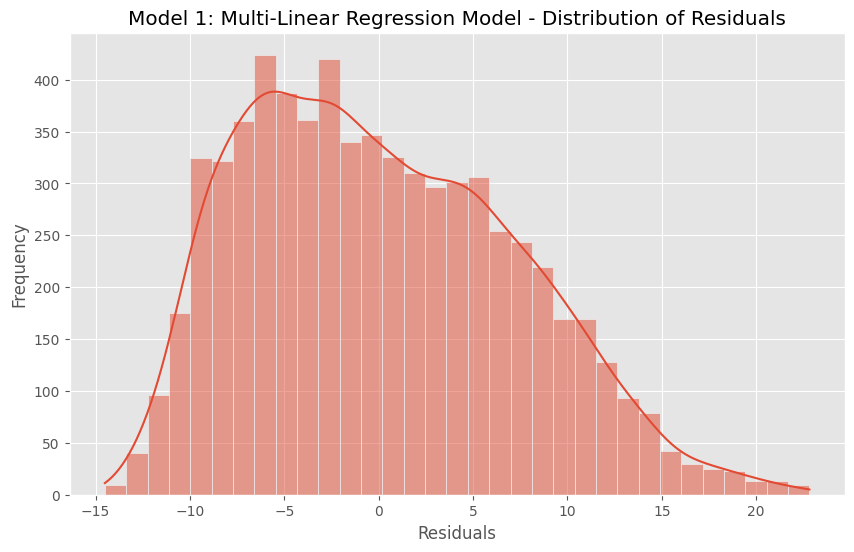

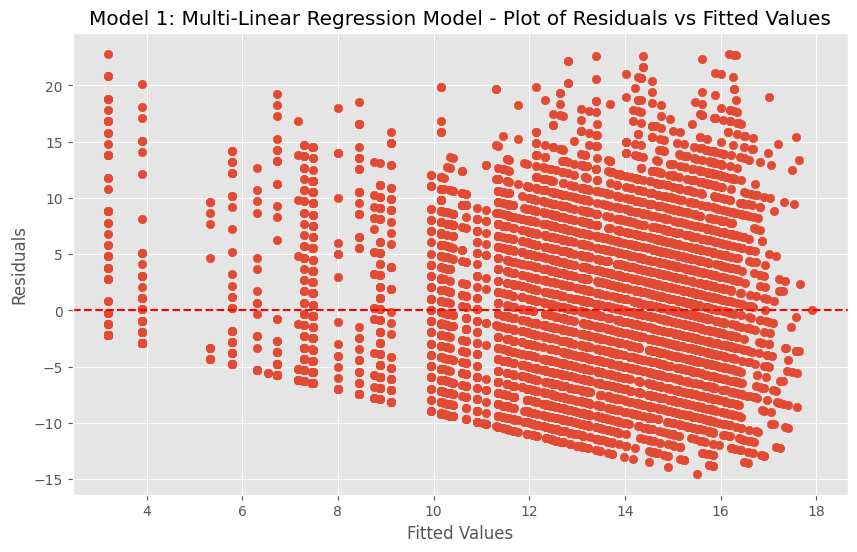

In [106]:
# Check residuals
residuals1 = y1_test.squeeze() - y1_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals1, kde=True)
plt.title('Model 1: Multi-Linear Regression Model - Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y1_pred, residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.title('Model 1: Multi-Linear Regression Model - Plot of Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [107]:
# Evalute model results
print('mean_squared_error: ', mean_squared_error(y1_test, y1_pred)) 
print('mean_absolute_error: ', mean_absolute_error(y1_test, y1_pred)) 

mean_squared_error:  50.91282722305548
mean_absolute_error:  5.9376491482117375


### PRED_MDL02 - Multi Linear Regression Model with Driver Age Outliers Removed
- Removing the age outliers has helped to improve the coefficient of determination (R-squared = 0.219) and lower both MSE and MAE. This may be because of outliers skewing the model results as Linear Regression is very sensitive to the presence of outliers.
- Model #2 results:
    - An improved 22% of the variation in race position can be explained by this model (R-squared = 0.219) i.e 13.4% of the variation in race finishing positions can be explained by this model.
    - All predictor variables are now statistically significant (p-value <>> 0.05) including age_first_race_x.
    - The residuals from this are normally distributed and the residuals are more randomly spread with 50% of value being above and below the sero line, which means the model is a good fit for the given driver performance features. 
        - The model has a much improved predictive error of 4.3 race positions (mean_absolute_error = 4.2894487542566), which means predictions using this datasets werer accurate up to plus or minus 4.3 race finishing positions.

In [108]:
# Decision: Remove outliers for age_at_first_race_x & age_at_last_race
df_filtered = df_dp_vars_nan1[df_dp_vars_nan1['current_age'] <= 45]
df_dp_no_age_outliers = df_filtered[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins', 'positionOrder']]

In [109]:
# Split data into train and test data sets
X2 = df_dp_no_age_outliers[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins']]
y2 = df_dp_no_age_outliers[['positionOrder']]

# Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

In [110]:
# Convert train and test datasets into DataFrames
X2_train = pd.DataFrame(X2_train)
X2_test = pd.DataFrame(X2_test)

# Add constant (intercept) to predictor variables for the training set
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

# Train the model
model2 = sm.OLS(y2_train, X2_train).fit()
print(model2.summary())

# Evaluate model peformance
y2_pred = model2.predict(X2_test)
r2_sqr_test = r2_score(y2_test, y2_pred)
print(f'R-squared on testing dataset: {r2_sqr_test}')

                            OLS Regression Results                            
Dep. Variable:          positionOrder   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     389.4
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          5.16e-296
Time:                        11:58:50   Log-Likelihood:                -17274.
No. Observations:                5547   AIC:                         3.456e+04
Df Residuals:                    5542   BIC:                         3.459e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6339      0.915  

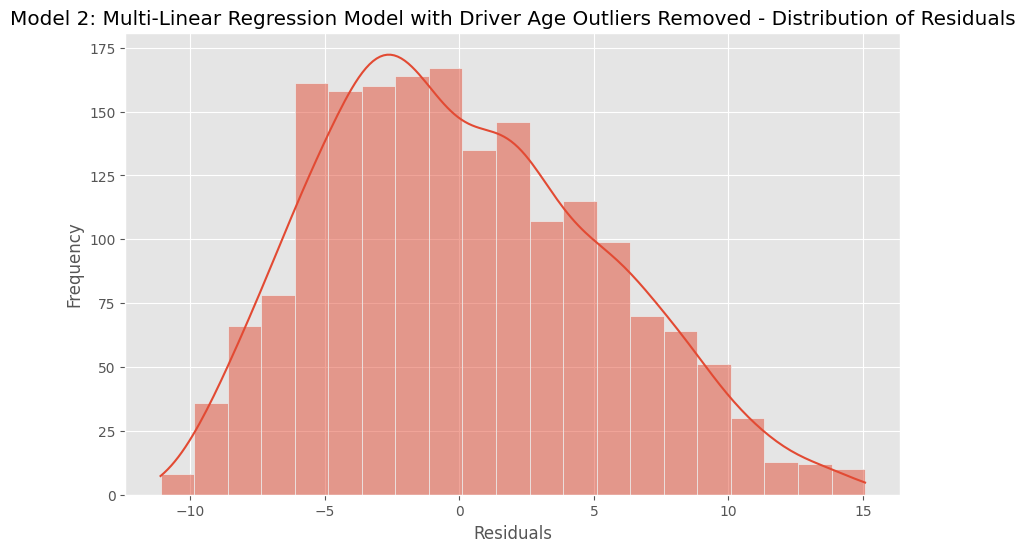

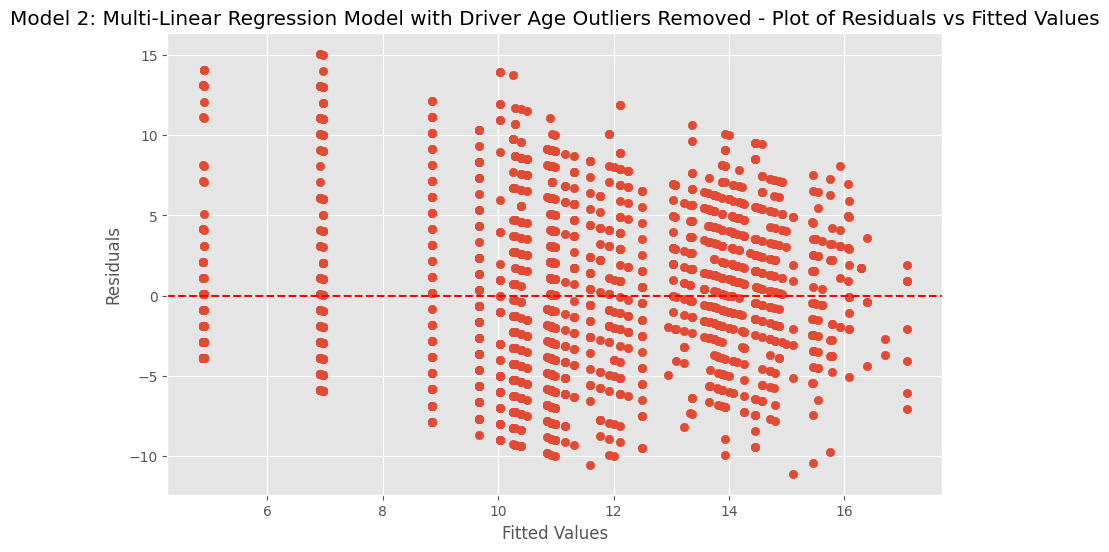

In [111]:
# Check residuals
residuals2 = y2_test.squeeze() - y2_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals2, kde=True)
plt.title('Model 2: Multi-Linear Regression Model with Driver Age Outliers Removed - Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y2_pred, residuals2)
plt.axhline(0, color='red', linestyle='--')
plt.title('Model 2: Multi-Linear Regression Model with Driver Age Outliers Removed - Plot of Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [112]:
# Evalute model results
print('mean_squared_error: ', mean_squared_error(y2_test, y2_pred)) 
print('mean_absolute_error: ', mean_absolute_error(y2_test, y2_pred)) 

mean_squared_error:  27.09285187672451
mean_absolute_error:  4.2894487542566


### PRED_MDL03 - XGBoost Model with Driver Age Outliers Removed
- Using XGBoost rather than a multi linear regression mode has helped to improve the coefficient of determination (R-squared = 0.311) and slightly lowered both MSE and MAE. XGBoost was chosen to overcome lack of non-linear relationships between predictor and target variables as well as applying featrure weighting and other boosting techniques. It has also a popular model due to these attributes with good success.
- Model #3 results:
    - Coefficient of variation has been further improved to 31% (R-squared = 0.311).
    - The residuals from this are normally distributed and the residuals are more randomly spread with 50% of value being above and below the sero line, which means the model is a good fit for the given driver performance features. 
        - The model has a slightly improved predictive error of 4.1 race positions (mean_absolute_error = 4.091817346521326), which means predictions using this datasets werer accurate up to plus or minus 4.1 race positions.

In [113]:
# Split data into train and test data sets
X3 = df_dp_no_age_outliers[['current_age', 'exp_years', 'age_first_race_x', 'avg_career_wins']]
y3 = df_dp_no_age_outliers[['positionOrder']]

# Split the data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=101)

In [114]:
# Convert train and test data into DMatrix
dtrain = xgb.DMatrix(X3_train, label=y3_train)
dtest = xgb.DMatrix(X3_test, label=y3_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # for regression task
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 101
}

# Train the model
model3 = xgb.train(params, dtrain, num_boost_round=100)

# Evalute model performance
y3_pred = model3.predict(dtest)
# r3_sqr_test = r2_score(y3_test, y3_pred)
# print(f'R-squared on testing dataset: {r3_sqr_test}')

# Predictions on training data
y3_train_pred = model3.predict(dtrain)

# Calculate R-squared for training data
r3_sqr_train = r2_score(y3_train, y3_train_pred)
print(f'R-squared on training dataset: {r3_sqr_train}')

# Predictions on test data
y3_test_pred = model3.predict(dtest)

# Calculate R-squared for test data
r3_sqr_test = r2_score(y3_test, y3_test_pred)
print(f'R-squared on testing dataset: {r3_sqr_test}')

R-squared on training dataset: 0.27455592155456543
R-squared on testing dataset: 0.3109416365623474


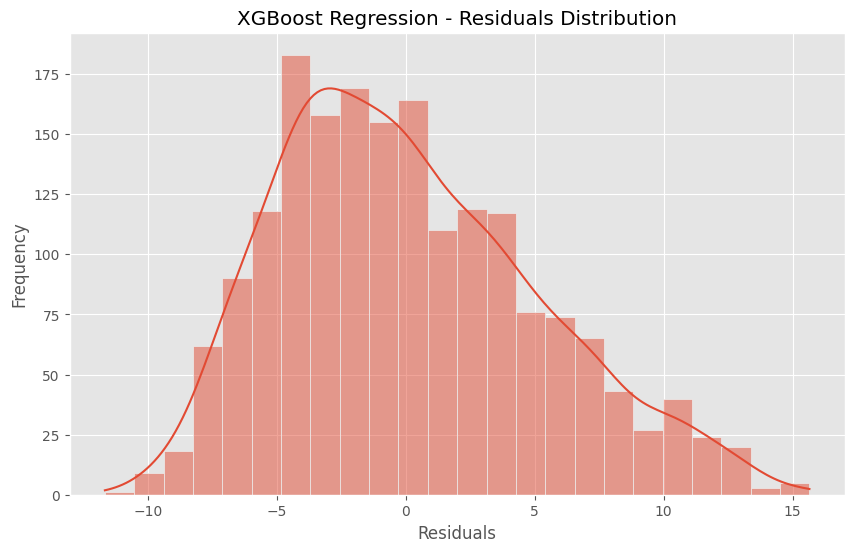

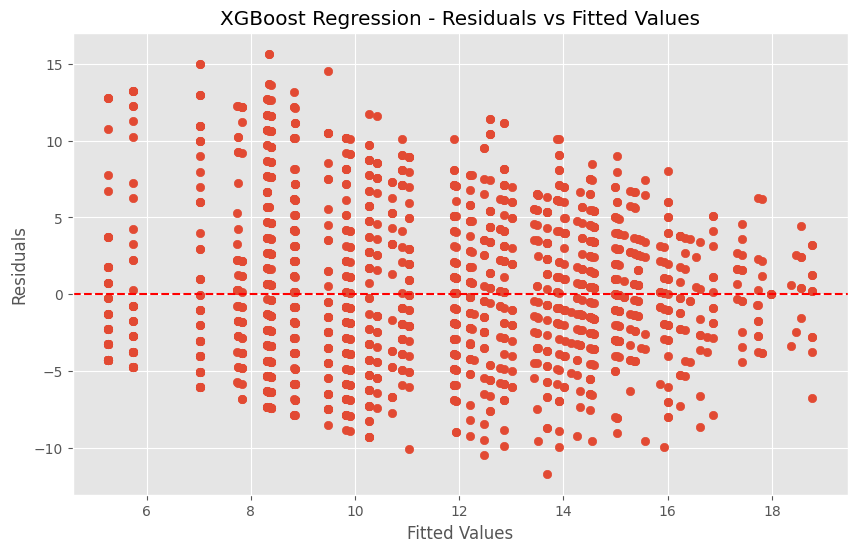

In [115]:
# Check residuals
residuals3 = y3_test.squeeze() - y3_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals3, kde=True)
plt.title('XGBoost Regression - Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y3_pred, residuals3)
plt.axhline(0, color='red', linestyle='--')
plt.title('XGBoost Regression - Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [116]:
# Evalute model results
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y3_test, y3_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y3_test, y3_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 25.41400194644321
Mean Absolute Error (MAE): 4.091817346521326


## Conclusions from Model Results
- TODO: Add summary here.
- TODO: Add next steps here.